In [1]:
# Standard imports
import io
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Data Checking & Cleaning

In [ ]:
# Define file path
file_path = os.path.join('..', 'data')

In [95]:
# Read csv and transfor to dataframe
data = pd.read_csv(file_path+'caraga-woe-input-road-agri-v1(2).csv')
data_df = pd.DataFrame(data)

In [94]:
print(data_df['defo'].unique())

[0 1]


In [96]:
# Assuming you want to calculate VIF for all columns in your DataFrame
features = data_df.columns

# Add a constant to the DataFrame
data_df['Intercept'] = 1

# Calculate and print VIF
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(data_df[features].values, i) for i in range(data_df[features].shape[1])]
vif["features"] = features
vif_sorted = vif.sort_values(by='VIF Factor', ascending=True)


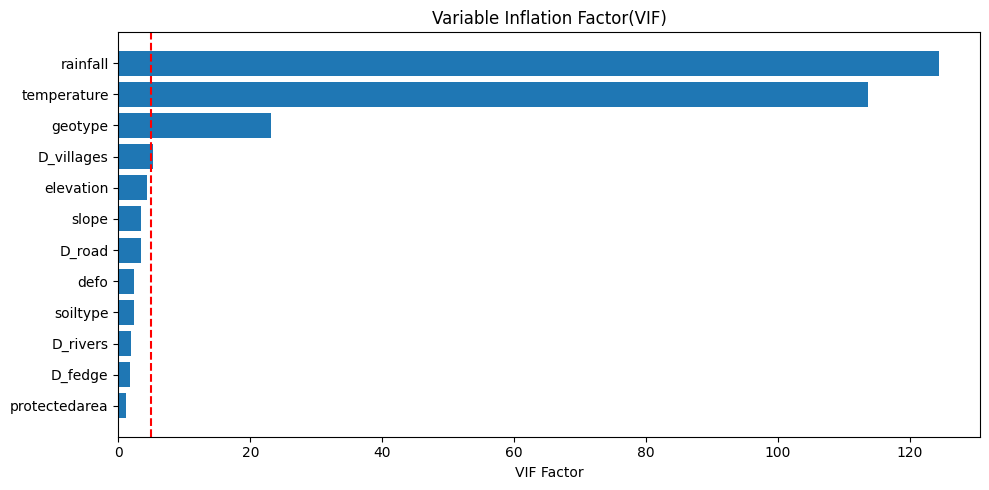

In [97]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.barh(vif_sorted['features'], width=vif_sorted['VIF Factor'])
ax.set_xlabel('VIF Factor')
ax.set_title('Variable Inflation Factor(VIF)')
ax.axvline(x=5, color='r', linestyle='--', label='VIF = 5')

plt.tight_layout()
plt.show()

In [98]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7891 entries, 0 to 7890
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   defo           7891 non-null   int64  
 1   D_fedge        7891 non-null   float64
 2   D_road         7891 non-null   float64
 3   D_rivers       7891 non-null   float64
 4   D_villages     7891 non-null   float64
 5   elevation      7891 non-null   int64  
 6   slope          7891 non-null   float64
 7   geotype        7891 non-null   int64  
 8   soiltype       7891 non-null   int64  
 9   protectedarea  7891 non-null   int64  
 10  temperature    7891 non-null   float64
 11  rainfall       7891 non-null   float64
 12  Intercept      7891 non-null   int64  
dtypes: float64(7), int64(6)
memory usage: 801.6 KB


In [104]:
# Print the shape of the dataframe
data_df.shape

(7891, 13)

In [105]:
# Check the data head
data_df.head()

,defo,D_fedge,D_road,D_rivers,D_villages,elevation,slope,geotype,soiltype,protectedarea,temperature,rainfall,Intercept
0,0,265.666210,4190.669698,737.792122,6400.090230,297,15.958173,16,45,0,26.840,3218.651753,1
1,0,0.000000,606.377084,1658.501654,1799.836705,37,10.992985,18,575,0,28.975,2681.358031,1
2,0,0.000000,0.000000,1543.113011,1091.750578,25,1.883916,23,1020,0,27.520,2661.916730,1
3,0,173.506243,3940.854469,736.725734,2745.471371,516,22.008760,16,45,0,25.890,3340.292637,1
4,0,0.000000,1027.107010,546.125576,1061.847820,22,1.318270,23,1,0,28.855,3245.928437,1


In [106]:
# Check the data head
data_df.tail()

,defo,D_fedge,D_road,D_rivers,D_villages,elevation,slope,geotype,soiltype,protectedarea,temperature,rainfall,Intercept
7886,1,66.422840,66.422833,1240.525327,1363.206282,88,15.618799,0,359,0,26.700000,2917.251579,1
7887,1,29.738086,199.489194,2034.398583,1114.682750,62,2.077678,21,108,0,28.523333,2931.186836,1
7888,1,0.000000,29.738378,1352.687665,1933.223345,63,5.261193,21,108,0,28.670000,2931.186836,1
7889,1,210.323927,274.228821,255.870074,3112.793794,116,16.678024,26,45,0,27.555000,3150.111646,1
7890,1,0.000000,29.729569,316.029656,2021.610712,113,8.740916,18,575,0,29.350000,2731.257812,1


In [107]:
# Recheck Duplicates
print('Dupilication:', data_df.duplicated().sum())

Dupilication: 0


In [108]:
# Recheck Null
data_null = data_df.isna().sum().reset_index().rename(columns={'index':'variable',0:'null count'})
data_null['null percentage'] = data_null['null count'].apply(lambda x: (x/(data_df.shape[0]))*100)
data_null

,variable,null count,null percentage
0,defo,0,0.0
1,D_fedge,0,0.0
2,D_road,0,0.0
3,D_rivers,0,0.0
4,D_villages,0,0.0
5,elevation,0,0.0
6,slope,0,0.0
7,geotype,0,0.0
8,soiltype,0,0.0
9,protectedarea,0,0.0


In [109]:
# Remove X and Y columns
df_input = data_df
# df_input = data_df.drop(columns=["system:index", ".geo"],axis=1)
# df_input.head()

# EDA

In [110]:
# statistic summary
df_input[df_input['defo'] == 0].describe()

,defo,D_fedge,D_road,D_rivers,D_villages,elevation,slope,geotype,soiltype,protectedarea,temperature,rainfall,Intercept
count,3945.0,3945.000000,3945.000000,3945.000000,3945.000000,3945.000000,3945.000000,3945.000000,3945.000000,3945.000000,3945.000000,3945.000000,3945.0
mean,0.0,173.561507,1413.894708,1183.899674,2287.323463,250.861343,12.253523,20.575919,382.728771,0.106210,27.398756,2921.044062,1.0
std,0.0,303.863449,1883.223438,1232.844941,1851.482775,279.943614,9.890565,4.681962,396.623249,0.308146,1.803746,275.947312,0.0
min,0.0,0.000000,0.000000,0.000000,29.720234,-1.000000,0.000000,0.000000,0.000000,0.000000,20.827500,1898.506314,1.0
25%,0.0,0.000000,239.411785,359.038424,1013.000717,46.000000,3.949348,18.000000,45.000000,0.000000,26.265000,2749.222990,1.0
50%,0.0,59.499091,620.320945,850.267270,1694.469247,137.000000,9.908015,19.000000,153.000000,0.000000,27.455000,2960.813413,1.0
75%,0.0,208.256304,1797.931019,1616.388288,2971.176388,372.000000,18.054893,26.000000,887.000000,0.000000,28.540000,3094.843315,1.0
max,0.0,3693.575499,11640.475890,11512.301603,12515.471144,1756.000000,63.532810,28.000000,1020.000000,1.000000,35.017500,3582.157416,1.0


In [111]:
# statistic summary
df_input[df_input['defo'] == 1].describe()

,defo,D_fedge,D_road,D_rivers,D_villages,elevation,slope,geotype,soiltype,protectedarea,temperature,rainfall,Intercept
count,3946.0,3946.000000,3946.000000,3946.000000,3946.000000,3946.000000,3946.000000,3946.000000,3946.000000,3946.000000,3946.000000,3946.000000,3946.0
mean,1.0,52.801107,301.029363,1261.766015,1280.613890,98.880892,9.653989,20.557780,425.534972,0.066903,28.069005,2896.659228,1.0
std,0.0,91.781405,401.894273,1375.154333,941.048026,66.163331,6.907104,4.502564,368.040480,0.249886,0.936380,266.302679,0.0
min,1.0,0.000000,0.000000,0.000000,29.721008,3.000000,0.000000,0.000000,0.000000,0.000000,23.938750,1898.506314,1.0
25%,1.0,0.000000,89.163099,359.239575,641.154410,54.000000,4.627368,18.000000,82.000000,0.000000,27.450000,2740.463147,1.0
50%,1.0,29.737892,208.259195,868.849991,1070.871147,83.000000,7.957471,19.000000,359.000000,0.000000,28.007500,2940.934045,1.0
75%,1.0,59.512963,367.447488,1642.454583,1642.810943,131.000000,13.273447,26.000000,886.000000,0.000000,28.660000,3074.719590,1.0
max,1.0,1143.451155,5411.329662,12319.344115,7534.012222,965.000000,44.265278,28.000000,1020.000000,1.000000,31.992500,3438.946880,1.0


In [112]:
df_input.skew().sort_values(ascending=False)

D_fedge          5.170811
D_road           3.224990
protectedarea    2.941341
D_rivers         2.846394
elevation        2.652584
D_villages       2.209267
slope            1.235400
soiltype         0.521796
Intercept        0.000000
defo            -0.000254
temperature     -0.512761
rainfall        -0.659599
geotype         -0.754209
dtype: float64

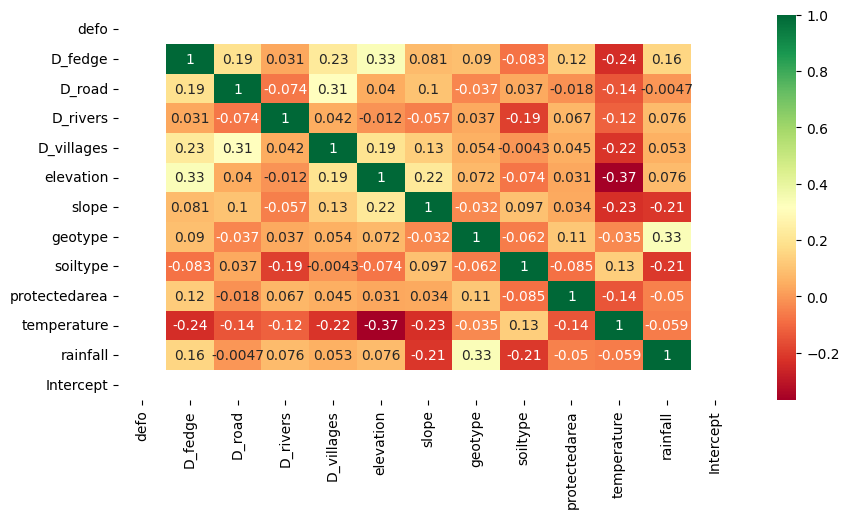

In [113]:
# Create correlation heatmap only deforestation pixels
plt.figure(figsize = (10,5))
sns.heatmap(df_input[df_input['defo'] == 1].corr(), annot = True, cmap='RdYlGn')
plt.show()

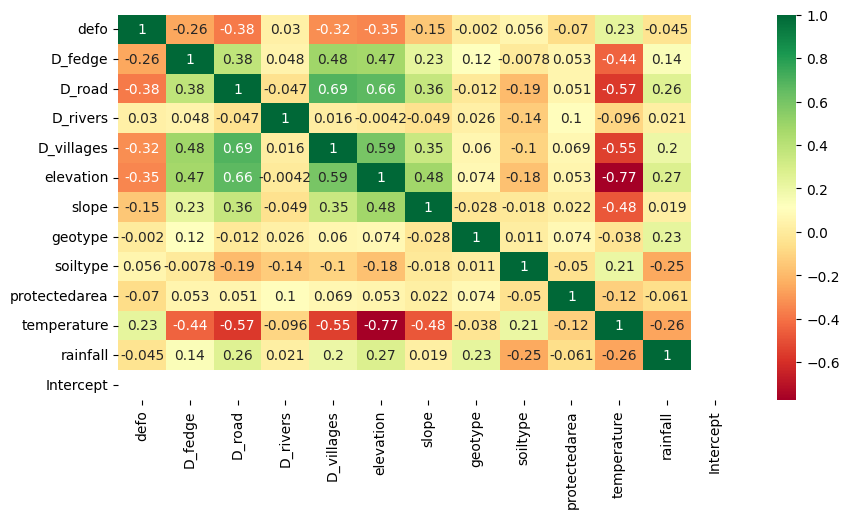

In [114]:
# Create correlation heatmap for both deforastation and non deforestation pixels
plt.figure(figsize = (10,5))
sns.heatmap(df_input.corr(), annot = True, cmap='RdYlGn')
plt.show()

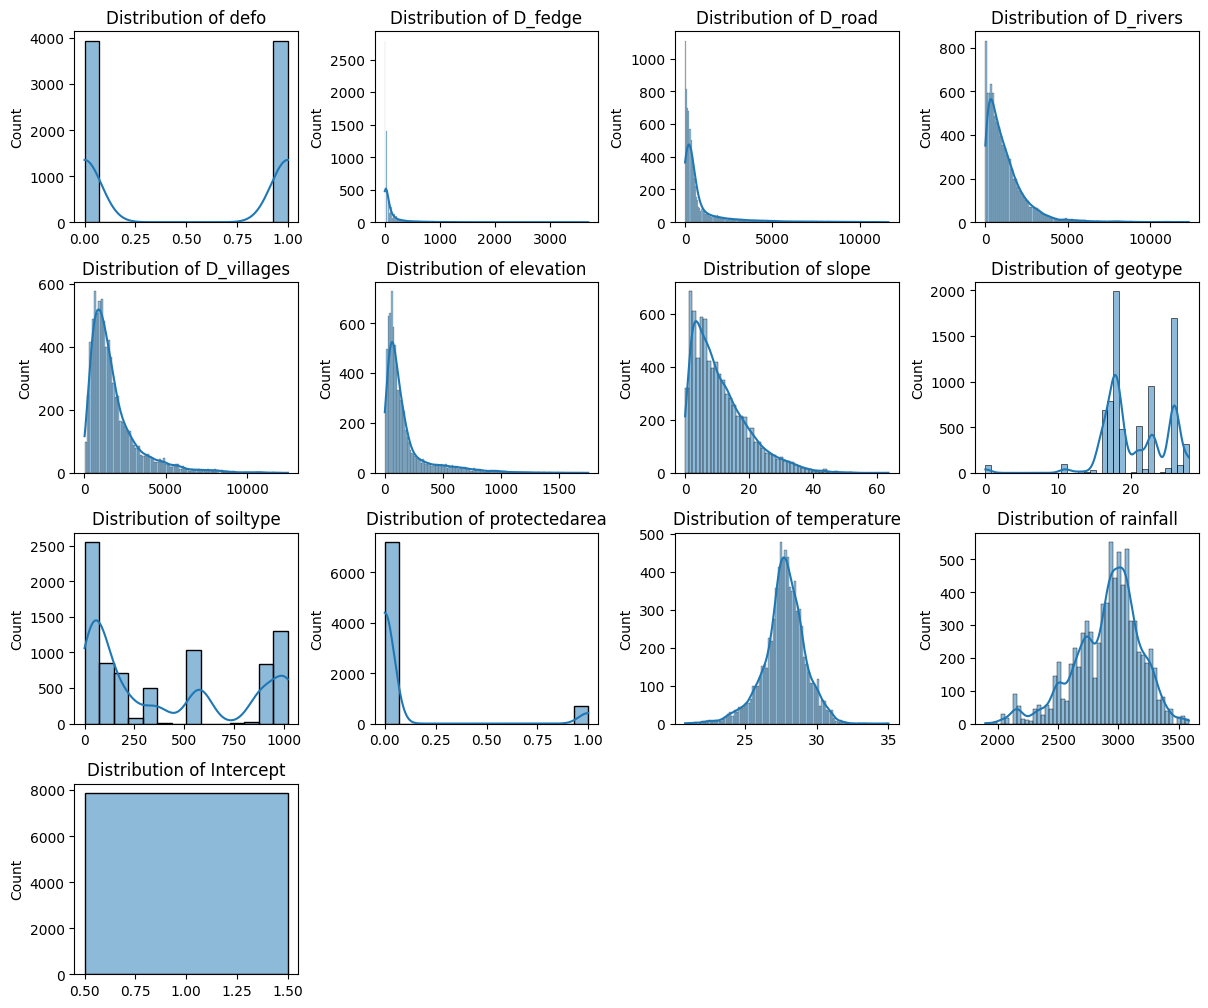

In [115]:
# Visualize Histogram
plt.figure(figsize=(12,10))  # Adjust figure size for better layout

# Calculate the number of rows and columns for subplots
num_cols = len(df_input.select_dtypes(include='number').columns)
num_rows = (num_cols + 3) // 4  # Calculate rows to accommodate all plots

for i, c in enumerate(df_input.select_dtypes(include='number').columns):
    plt.subplot(num_rows, 4, i+1)  # Dynamically adjust subplot grid
    sns.histplot(df_input[c],kde=True)
    plt.title("Distribution of " + c)
    plt.xlabel('')
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

# Define categories/bins

In [117]:
# Define Bins/Ranges/Category of each spatial determinants
ranges = {
          # 1) Distance to River
          "D_rivers"    : [0, 300, 600, 900, 1200, 1500, 1800, np.inf],
          
          # 2) Distance to Road
          "D_road"     : [0, 400, 800, 1200, 1600, 2000, 2400, np.inf],
          
          # 3) Distance to Villages
          "D_villages"  : [0, 1000, 2000, 3000, 4000, 5000, np.inf],
          
          # 4) Distance to Forest Edge
          "D_fedge"     : [0, 100, 200, 300, 400, 500, np.inf],
          
          # 5) Elevation
          "elevation"   : [0, 100, 200, 300, 400, 500, np.inf],
          
          # 6) Slope
          "slope"       : [0, 5, 15, 20, 25, 30, np.inf],
          
          # 7) Geotype
          "geotype" : [
                            '0', '11', '12', '13', '14', '15', '16', '17', '18', '19', 
                            '20', '21', '22', '23', '24', '25', '26', '27', '28','29', '30'
          
                          ],
          
          # 8) Mining right
          "mineright":["0", "1"],
          
          # 9) Soil Type
          "soiltype"    : [
                            "0", "1", "5", "45", "82", "94", "108", "118", "126", "132", "152", "153", "154", "161", "168", "190", "206",
                            "207", "208", "209", "210", "211", "212", "213", "228", "236", "256", "270", "305", "307", "315", "318",
                            "320", "325", "359", "362", "363", "365", "366", "433", "439", "442", "575", "583", "596", "599", "752",
                            "851", "873", "885", "886", "887", "888", "889", "890", "999", "1002", "1003", "1008", "1009", "1010",
                            "1011", "1012", "1013", "1019", "1020"
                          ],

          # 10) Protected Area                
          "protectedarea":["0", "1"],

          # 11) Temperature
          "temperature" : [0, 23, 25, 27, 29, 32, np.inf],

          # 12) Rainfall
          "rainfall" : [0, 1850, 2150, 2450, 2750, 3440, np.inf]
          
            
}
ranges

{'D_rivers': [0, 300, 600, 900, 1200, 1500, 1800, inf],
 'D_road': [0, 400, 800, 1200, 1600, 2000, 2400, inf],
 'D_villages': [0, 1000, 2000, 3000, 4000, 5000, inf],
 'D_fedge': [0, 100, 200, 300, 400, 500, inf],
 'elevation': [0, 100, 200, 300, 400, 500, inf],
 'slope': [0, 5, 15, 20, 25, 30, inf],
 'geotype': ['0',
  '11',
  '12',
  '13',
  '14',
  '15',
  '16',
  '17',
  '18',
  '19',
  '20',
  '21',
  '22',
  '23',
  '24',
  '25',
  '26',
  '27',
  '28',
  '29',
  '30'],
 'mineright': ['0', '1'],
 'soiltype': ['0',
  '1',
  '5',
  '45',
  '82',
  '94',
  '108',
  '118',
  '126',
  '132',
  '152',
  '153',
  '154',
  '161',
  '168',
  '190',
  '206',
  '207',
  '208',
  '209',
  '210',
  '211',
  '212',
  '213',
  '228',
  '236',
  '256',
  '270',
  '305',
  '307',
  '315',
  '318',
  '320',
  '325',
  '359',
  '362',
  '363',
  '365',
  '366',
  '433',
  '439',
  '442',
  '575',
  '583',
  '596',
  '599',
  '752',
  '851',
  '873',
  '885',
  '886',
  '887',
  '888',
  '889',
  '89

In [118]:
labels = {
          # 1. D_Rivers
          "D_rivers" : ["DRiv_<300", "DRiv_300-600", "DRiv_600-900", "DRiv_900-1200","DRiv_1200-1500","DRiv_1500-1800","DRiv_>1800"],
          
          # 2. D_Roads
          "D_road" : ["DRod_<400","DRod_400-800","DRod_800-1200","DRod_1200-1600","DRod_1600-2000","DRod_2000-2400","DRod_>2400"],
          
          # 3. D_Villages
          "D_villages" : ["DVil_<1000","DVil_1000-2000","DVil_2000-3000","DVil_3000-4000","DVil_4000-5000","DVil_>5000"],
          
          # 4. D_Fedge
          "D_fedge" : ["DFed_<100", "DFed_100-200","DFed_200-300","DFed_300-400","DFed_400-500","DFed_>500"],
          
          # 5. Elevation
          "elevation" : ["Elev_<100","Elev_100-200","Elev_200-300","Elev_300-400","Elev_400-500","Elev_>500"],
          
          # 6. Slope
          "slope" : ["Slpe_<5", "Slpe_5-15", "Slpe_15-20", "Slpe_20-25", "Slpe_25-30", "Slpe_>30"],
          
          # 7. GeologyType
          "geotype" : [
                            'geotype_NoData',
                            'geotype_Andesite_and/or_basalt_flows',
                            'geotype_Dacite_and/or_andesite',
                            'geotype_Dacite,_andesite_flows_and_dikes',
                            'geotype_Dacitic_and/or_andesitic_plugs',
                            'geotype_Gneiss,_schist,_phyllites-slates',
                            'geotype_Limestone,_sandstone,_shale',
                            'geotype_Marine_clastics,_pyroclastics',
                            'geotype_Marl,_reworked_tuff,_pyroclastic',
                            'geotype_Ophiolites_and_ophiolitic_rocks',
                            'geotype_Paleogene_quartz_diorite',
                            'geotype_Pliocene-Pleistocene_Limestone',
                            'geotype_Quartz_Diorite',
                            'geotype_Recent_deposits',
                            'geotype_Sandstone-shale,_spilites',
                            'geotype_Sandstone,_shales,_conglomerate',
                            'geotype_Sandstone,_shales,_reef_limestone',
                            'geotype_Spilitic_and_basic_flows',
                            'geotype_Undifferentiated',
                            'geotype_Undifferentiated_metavolcanics',
                            'geotype_Volcanic_plain/piedmont_deposits'
                            ],
          
        #   # 8. MiningRights
        #   "mineright" : ["MRght_No","MRght_Yes"],
          
          # 9. SoilType
          "soiltype" : [
                        "soiltype_NoData",
                        "soiltype_Hydrosol",
                        "soiltype_Quiangua_silt_loam",
                        "soiltype_Mountain_soil_undifferentiated",
                        "soiltype_San_Manuel_silt_San_Manuel_silt_loam_San_Miguel_silt_loam",
                        "soiltype_San_Manuel_silty_clay_loam",
                        "soiltype_Bolinao_clay_loam",
                        "soiltype_Beach_sand",
                        "soiltype_Alimodian_clay_loam",
                        "soiltype_Faraon_clay",
                        "soiltype_Faraon_clay_River_wash",
                        "soiltype_Bolinao_clay",
                        "soiltype_Bolinao_clay_Steep_phase",
                        "soiltype_Cabangan_clay_loam",
                        "soiltype_Umingan_clay_loam",
                        "soiltype_San_Manuel_loam",
                        "soiltype_Matina_clay",
                        "soiltype_Tugbok_clay",
                        "soiltype_Matina_clay_loam",
                        "soiltype_Miral_clay_loam",
                        "soiltype_Camasan_sandy_clay_loam",
                        "soiltype_Kidapawan_clay_Kidapawan_clay_loam",
                        "soiltype_Madunga_clay_loam",
                        "soiltype_Malalag_loam",
                        "soiltype_Bantog_clay",
                        "soiltype_San_Manuel_clay_loam",
                        "soiltype_Isabela_clay",
                        "soiltype_Tupi_fine_sandy_loam",
                        "soiltype_La_Castellana_clay_loam",
                        "soiltype_San_Manuel_clay",
                        "soiltype_Mambajao_clay",
                        "soiltype_Jasaan_silt_loam_Jasaan_clay_loam",
                        "soiltype_Camiguin_clay",
                        "soiltype_Macolod_clay",
                        "soiltype_Malalag_silt_loam",
                        "soiltype_Cabangan_clay",
                        "soiltype_Camansa_sandy",
                        "soiltype_Kicharo_clay_loam",
                        "soiltype_Rubble_land",
                        "soiltype_Soils_undifferentiated",
                        "soiltype_Nupol_sandy_loam",
                        "soiltype_Malandag_fine_sandy_loam",
                        "soiltype_Camansa_clay",
                        "soiltype_Kidapawan_sandy_clay_loam",
                        "soiltype_San_Manuel_sandy_clay_loam",
                        "soiltype_Rock_land",
                        "soiltype_Isabela_loam",
                        "soiltype_Guadalupe_clay",
                        "soiltype_Butuan_clay",
                        "soiltype_Alimodian_clay",
                        "soiltype_Bolinao_silt_loam",
                        "soiltype_Butuan_loam",
                        "soiltype_Kidapawan_loam",
                        "soiltype_Kitcharao_silt_loam",
                        "soiltype_Mambutay_sandy_loam",
                        "soiltype_Unknown",
                        "soiltype_Kabatohan_loam",
                        "soiltype_Matho_clay",
                        "soiltype_Sison_clay_loam",
                        "soiltype_Malimono_clay_loam",
                        "soiltype_Surigao_clay_loam",
                        "soiltype_Jamoyaon_clay_loam",
                        "soiltype_Anao_aon_silty_clay",
                        "soiltype_Sapa_clay_loam",
                        "soiltype_Bad_as_sandy_loam",
                        "soiltype_Dinagat_clay_loam"
                    ],
        # 10. ProtectedArea
        "protectedarea" : ["PArea_No","PArea_Yes"],

        # 11. Temperature
        "temperature" : ["Temp_<23","Temp_23-25","Temp_25-27","Temp_27-29","Temp_29-32","Temp_>32"],

        # 12. Rainfall
        "rainfall" : ["Rain_<1850","Rain_1850-2150","Rain_2150-2450","Rain_2450-2750","Rain_2750-3440","Rain_>3440"]

}
labels

{'D_rivers': ['DRiv_<300',
  'DRiv_300-600',
  'DRiv_600-900',
  'DRiv_900-1200',
  'DRiv_1200-1500',
  'DRiv_1500-1800',
  'DRiv_>1800'],
 'D_road': ['DRod_<400',
  'DRod_400-800',
  'DRod_800-1200',
  'DRod_1200-1600',
  'DRod_1600-2000',
  'DRod_2000-2400',
  'DRod_>2400'],
 'D_villages': ['DVil_<1000',
  'DVil_1000-2000',
  'DVil_2000-3000',
  'DVil_3000-4000',
  'DVil_4000-5000',
  'DVil_>5000'],
 'D_fedge': ['DFed_<100',
  'DFed_100-200',
  'DFed_200-300',
  'DFed_300-400',
  'DFed_400-500',
  'DFed_>500'],
 'elevation': ['Elev_<100',
  'Elev_100-200',
  'Elev_200-300',
  'Elev_300-400',
  'Elev_400-500',
  'Elev_>500'],
 'slope': ['Slpe_<5',
  'Slpe_5-15',
  'Slpe_15-20',
  'Slpe_20-25',
  'Slpe_25-30',
  'Slpe_>30'],
 'geotype': ['geotype_NoData',
  'geotype_Andesite_and/or_basalt_flows',
  'geotype_Dacite_and/or_andesite',
  'geotype_Dacite,_andesite_flows_and_dikes',
  'geotype_Dacitic_and/or_andesitic_plugs',
  'geotype_Gneiss,_schist,_phyllites-slates',
  'geotype_Limestone

# Reclassify the table using pre-defined bins/categories

In [119]:
# Function to categorize and label columns
def categorize_and_label(df, ranges, labels):
    for column in ranges:
        if column in labels:
            if isinstance(ranges[column][0], (int, float)):
                df[column + '_label'] = pd.cut(df[column], bins=ranges[column], labels=labels[column], right=False)
            else:
                df[column + '_label'] = df[column].astype(str).replace(dict(zip(ranges[column], labels[column])))
    return df

# Apply categorization and labeling
df_reclassified = categorize_and_label(df_input, ranges, labels)

In [120]:
# Check new column "_label" which is reclassification column
df_reclassified.head()

,defo,D_fedge,D_road,D_rivers,D_villages,elevation,slope,geotype,soiltype,protectedarea,...,D_road_label,D_villages_label,D_fedge_label,elevation_label,slope_label,geotype_label,soiltype_label,protectedarea_label,temperature_label,rainfall_label
0,0,265.666210,4190.669698,737.792122,6400.090230,297,15.958173,16,45,0,...,DRod_>2400,DVil_>5000,DFed_200-300,Elev_200-300,Slpe_15-20,"geotype_Limestone,_sandstone,_shale",soiltype_Mountain_soil_undifferentiated,PArea_No,Temp_25-27,Rain_2750-3440
1,0,0.000000,606.377084,1658.501654,1799.836705,37,10.992985,18,575,0,...,DRod_400-800,DVil_1000-2000,DFed_<100,Elev_<100,Slpe_5-15,"geotype_Marl,_reworked_tuff,_pyroclastic",soiltype_Camansa_clay,PArea_No,Temp_27-29,Rain_2450-2750
2,0,0.000000,0.000000,1543.113011,1091.750578,25,1.883916,23,1020,0,...,DRod_<400,DVil_1000-2000,DFed_<100,Elev_<100,Slpe_<5,geotype_Recent_deposits,soiltype_Dinagat_clay_loam,PArea_No,Temp_27-29,Rain_2450-2750
3,0,173.506243,3940.854469,736.725734,2745.471371,516,22.008760,16,45,0,...,DRod_>2400,DVil_2000-3000,DFed_100-200,Elev_>500,Slpe_20-25,"geotype_Limestone,_sandstone,_shale",soiltype_Mountain_soil_undifferentiated,PArea_No,Temp_25-27,Rain_2750-3440
4,0,0.000000,1027.107010,546.125576,1061.847820,22,1.318270,23,1,0,...,DRod_800-1200,DVil_1000-2000,DFed_<100,Elev_<100,Slpe_<5,geotype_Recent_deposits,soiltype_Hydrosol,PArea_No,Temp_27-29,Rain_2750-3440


# Function to Compute WoE, IV, Coefficient & Contribution

In [121]:
# Create Function for calculating WoE and IV
def calculate_woe_iv(df, column):

    # Define columnname
    column_name = 'defo'

    # Replace 'Deforestation' with the actual column name if it's different in your dataframe
    counts = df.groupby([column, column_name]).size().unstack(fill_value=0)

    # Calculate the total sum of each column
    total_sum_0 = counts[0].sum()
    total_sum_1 = counts[1].sum()

    # Sum each bin
    counts['sum_bin'] = (counts[0]+counts[1])

    # Compute positive probability distribution
    counts['dist_def_probs'] = counts[1] / counts['sum_bin']*100

    # Compute negative probability distribution
    counts['dist_nodef_probs'] = counts[0] / counts['sum_bin']

    # Calculate the percentage distribution for each column
    counts['% 0'] = (counts[0] / total_sum_0) * 100
    counts['% 1'] = (counts[1] / total_sum_1) * 100

    # Calculate WoE for each row, handling potential division by zero
    counts['WoE'] = np.log(counts['% 1'] / counts['% 0'].replace(0, np.nan))

    # Calculate Information Value
    counts['IV'] = (counts['% 1'] - counts['% 0']) * counts['WoE'] / 100

    # Format numerical columns to display 2 decimal places
    counts_df = counts.round(6)

    # Include original column as index name
    counts_df[column] = counts_df.index  # Set the index name to the original column name

    return counts_df

# Apply the function across all the spatial determinants and visualize with chart

### 1. Distance to River

In [122]:
# WoE and IV D_River
river_woe = calculate_woe_iv(df_reclassified, 'D_rivers_label')
river_woe

defo,0,1,sum_bin,dist_def_probs,dist_nodef_probs,% 0,% 1,WoE,IV,D_rivers_label
D_rivers_label,,,,,,,,,,
DRiv_<300,831,841,1672,50.299043,0.497010,21.064639,21.312722,0.011708,0.000029,DRiv_<300
DRiv_300-600,690,612,1302,47.004608,0.529954,17.490494,15.509377,-0.120213,0.002382,DRiv_300-600
DRiv_600-900,537,549,1086,50.552486,0.494475,13.612167,13.912823,0.021847,0.000066,DRiv_600-900
DRiv_900-1200,421,446,867,51.441753,0.485582,10.671736,11.302585,0.057433,0.000362,DRiv_900-1200
DRiv_1200-1500,364,371,735,50.476190,0.495238,9.226869,9.401926,0.018795,0.000033,DRiv_1200-1500
DRiv_1500-1800,278,259,537,48.230912,0.517691,7.046895,6.563609,-0.071047,0.000343,DRiv_1500-1800
DRiv_>1800,824,868,1692,51.300236,0.486998,20.887199,21.996959,0.051768,0.000574,DRiv_>1800


/tmp/ipykernel_2420/606778289.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(labels, rotation = 30)


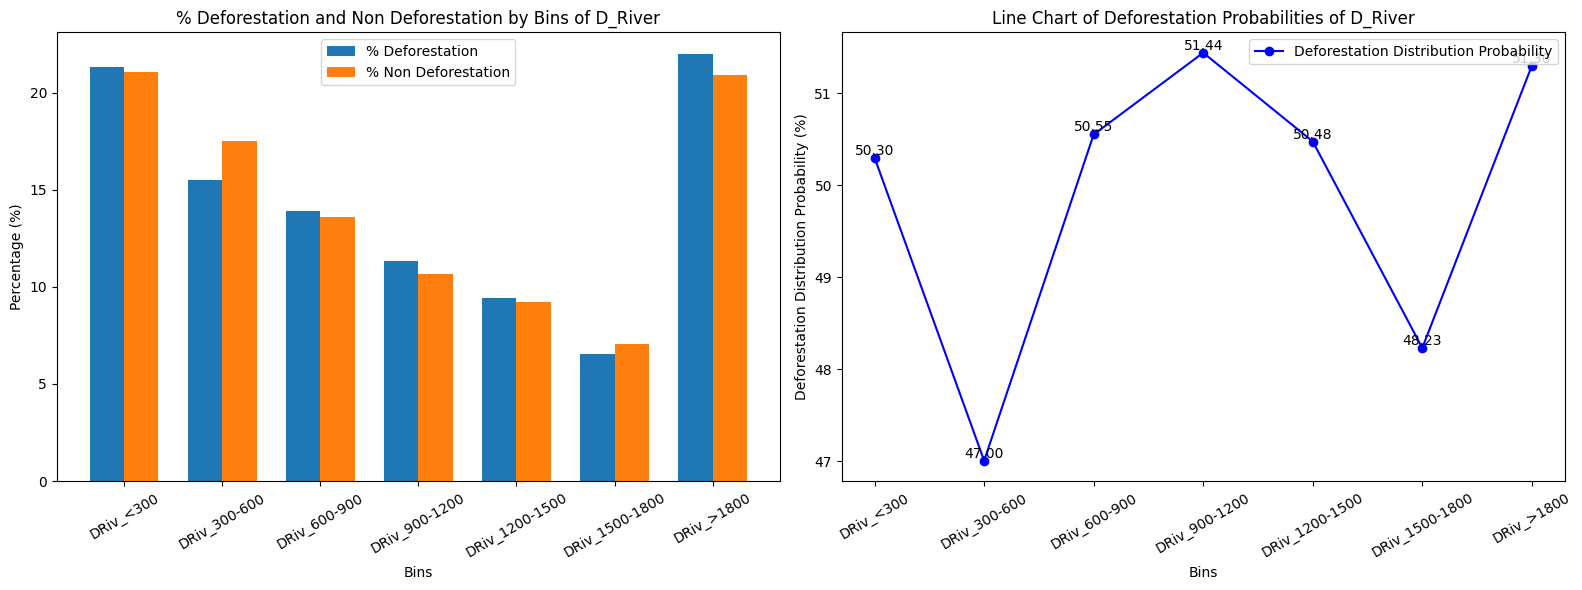

In [123]:
# --- Bar Chart ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns of plots

labels = river_woe.index
percent_1 = river_woe['% 1']
percent_0 = river_woe['% 0']

width = 0.35
x = np.arange(len(labels))

ax1.bar(x - width/2, percent_1, width, label='% Deforestation')
ax1.bar(x + width/2, percent_0, width, label='% Non Deforestation')

ax1.set_xlabel('Bins')
ax1.set_ylabel('Percentage (%)')
ax1.set_title('% Deforestation and Non Deforestation by Bins of D_River')
ax1.set_xticks(x)
ax1.set_xticklabels(labels, rotation = 30)
ax1.legend()

# --- Line Chart ---
ax2.plot(river_woe.index, river_woe['dist_def_probs'], marker='o', linestyle='-', color='b', label='Deforestation Distribution Probability')

# Annotating the labels
for i, label in enumerate(river_woe['dist_def_probs']):
    ax2.text(i, label, f"{label:.2f}", ha='center', va='bottom')

ax2.set_xlabel('Bins')
ax2.set_ylabel('Deforestation Distribution Probability (%)')
ax2.set_title('Line Chart of Deforestation Probabilities of D_River')
ax2.set_xticklabels(labels, rotation = 30)
ax2.legend()

plt.tight_layout()  # Adjusts spacing between plots
plt.show()

### 2. Distance to Road

In [124]:
# WoE Roads
roads_woe = calculate_woe_iv(df_reclassified, 'D_road_label')
roads_woe

defo,0,1,sum_bin,dist_def_probs,dist_nodef_probs,% 0,% 1,WoE,IV,D_road_label
D_road_label,,,,,,,,,,
DRod_<400,1467,3112,4579,67.962437,0.320376,37.186312,78.864673,0.751793,0.313335,DRod_<400
DRod_400-800,788,624,1412,44.192635,0.558074,19.974651,15.813482,-0.233601,0.009721,DRod_400-800
DRod_800-1200,378,73,451,16.186253,0.838137,9.581749,1.849975,-1.644688,0.127164,DRod_800-1200
DRod_1200-1600,229,54,283,19.081272,0.809187,5.804816,1.368474,-1.444991,0.064105,DRod_1200-1600
DRod_1600-2000,188,35,223,15.695067,0.843049,4.765526,0.886974,-1.681347,0.065212,DRod_1600-2000
DRod_2000-2400,135,16,151,10.596026,0.894040,3.422053,0.405474,-2.132940,0.064342,DRod_2000-2400
DRod_>2400,760,32,792,4.040404,0.959596,19.264892,0.810948,-3.167836,0.584591,DRod_>2400


/tmp/ipykernel_2420/2856168778.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(labels, rotation = 30)


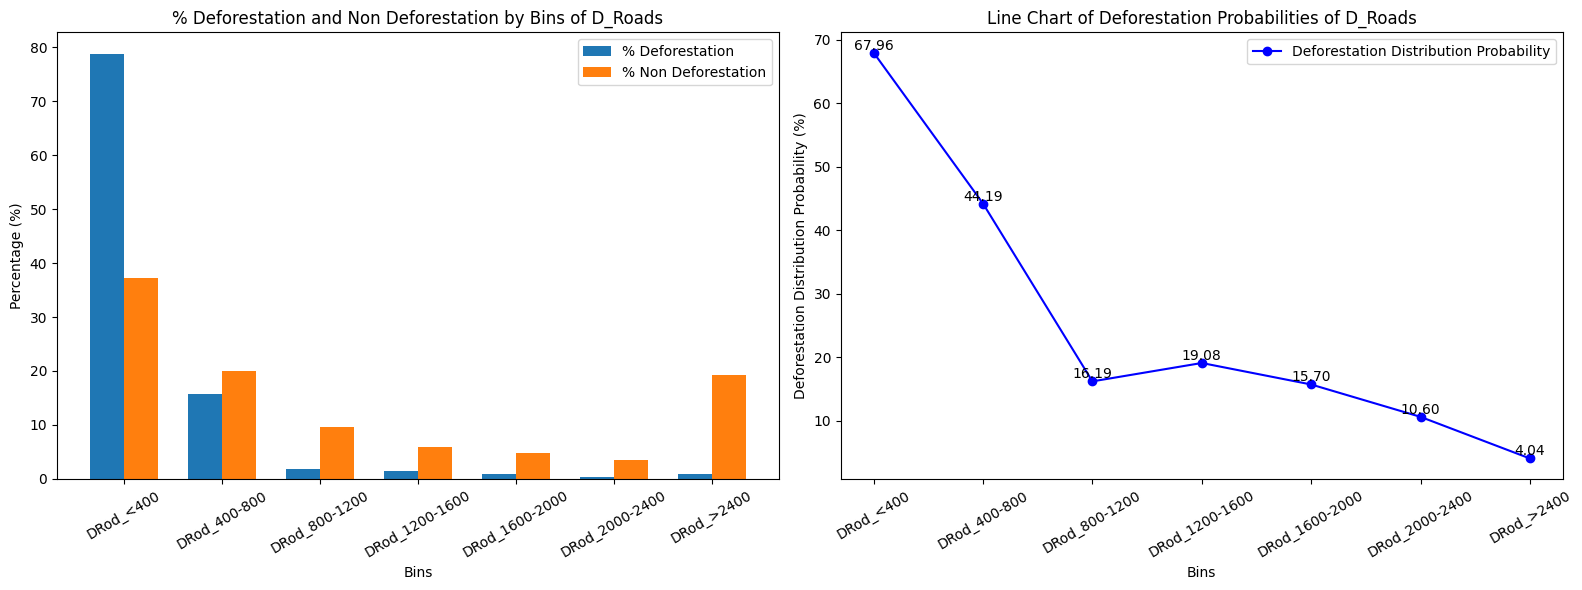

In [125]:
# --- Bar Chart ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns of plots

labels = roads_woe.index
percent_1 = roads_woe['% 1']
percent_0 = roads_woe['% 0']

width = 0.35
x = np.arange(len(labels))

ax1.bar(x - width/2, percent_1, width, label='% Deforestation')
ax1.bar(x + width/2, percent_0, width, label='% Non Deforestation')

ax1.set_xlabel('Bins')
ax1.set_ylabel('Percentage (%)')
ax1.set_title('% Deforestation and Non Deforestation by Bins of D_Roads')
ax1.set_xticks(x)
ax1.set_xticklabels(labels,rotation=30)
ax1.legend()

# --- Line Chart ---
ax2.plot(roads_woe.index, roads_woe['dist_def_probs'], marker='o', linestyle='-', color='b', label='Deforestation Distribution Probability')

# Annotating the labels
for i, label in enumerate(roads_woe['dist_def_probs']):
    ax2.text(i, label, f"{label:.2f}", ha='center', va='bottom')

ax2.set_xlabel('Bins')
ax2.set_ylabel('Deforestation Distribution Probability (%)')
ax2.set_title('Line Chart of Deforestation Probabilities of D_Roads')
ax2.set_xticklabels(labels, rotation = 30)
ax2.legend()

plt.tight_layout()  # Adjusts spacing between plots
plt.show()

### 3. Distance to Village

In [126]:
# WoE Villages
village_woe = calculate_woe_iv(df_reclassified, 'D_villages_label')
village_woe.sort_values(by='WoE', ascending=False)

defo,0,1,sum_bin,dist_def_probs,dist_nodef_probs,% 0,% 1,WoE,IV,D_villages_label
D_villages_label,,,,,,,,,,
DVil_<1000,967,1829,2796,65.414878,0.345851,24.512041,46.350735,0.637073,0.139128,DVil_<1000
DVil_1000-2000,1302,1509,2811,53.681964,0.463180,33.003802,38.241257,0.147292,0.007714,DVil_1000-2000
DVil_2000-3000,703,401,1104,36.322464,0.636775,17.820025,10.162190,-0.561649,0.043010,DVil_2000-3000
DVil_3000-4000,377,121,498,24.297189,0.757028,9.556401,3.066396,-1.136708,0.073772,DVil_3000-4000
DVil_4000-5000,249,46,295,15.593220,0.844068,6.311787,1.165737,-1.689065,0.086920,DVil_4000-5000
DVil_>5000,347,40,387,10.335917,0.896641,8.795944,1.013685,-2.160699,0.168151,DVil_>5000


/tmp/ipykernel_2420/918164783.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(labels, rotation = 30)


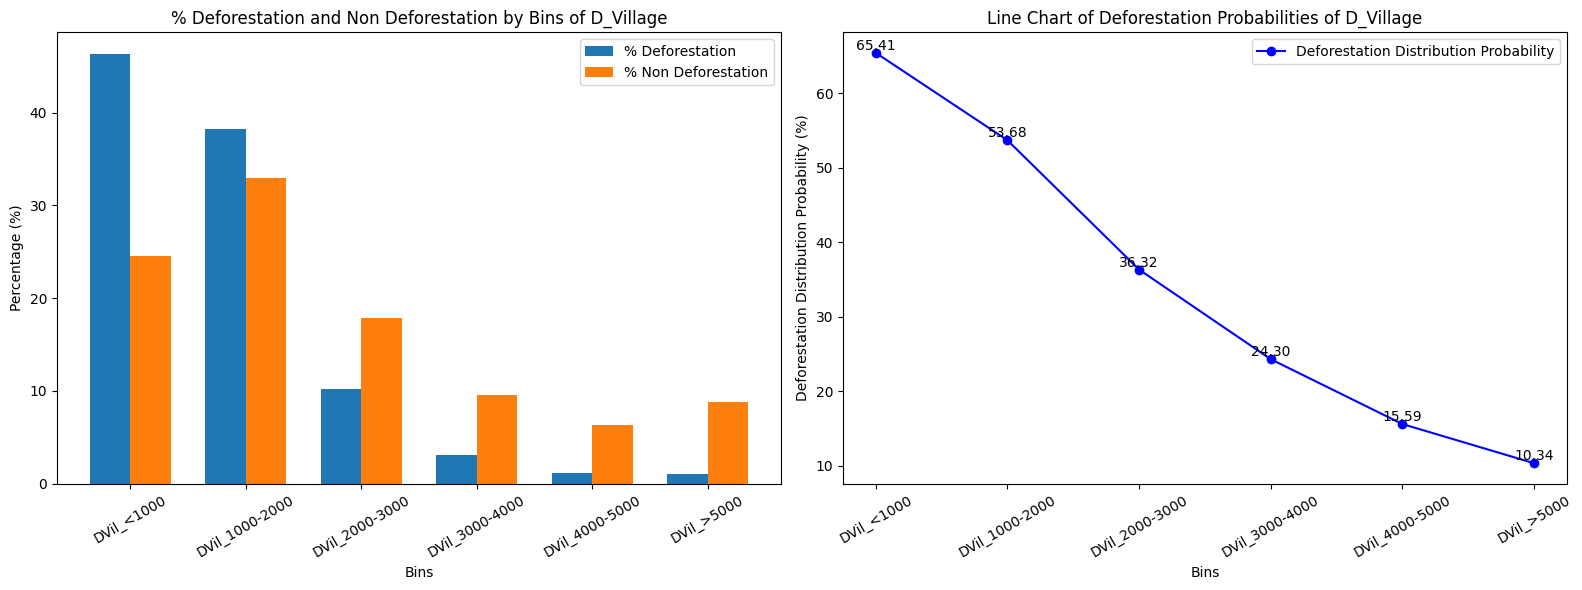

In [127]:
village_woe = village_woe.sort_values(by='% 1', ascending=False)

# --- Bar Chart ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns of plots

labels = village_woe.index
percent_1 = village_woe['% 1']
percent_0 = village_woe['% 0']

width = 0.35
x = np.arange(len(labels))

ax1.bar(x - width/2, percent_1, width, label='% Deforestation')
ax1.bar(x + width/2, percent_0, width, label='% Non Deforestation')

ax1.set_xlabel('Bins')
ax1.set_ylabel('Percentage (%)')
ax1.set_title('% Deforestation and Non Deforestation by Bins of D_Village')
ax1.set_xticks(x)
ax1.set_xticklabels(labels, rotation = 30)
ax1.legend()

# --- Line Chart ---
ax2.plot(village_woe.index, village_woe['dist_def_probs'], marker='o', linestyle='-', color='b', label='Deforestation Distribution Probability')

# Annotating the labels
for i, label in enumerate(village_woe['dist_def_probs']):
    ax2.text(i, label, f"{label:.2f}", ha='center', va='bottom')

ax2.set_xlabel('Bins')
ax2.set_ylabel('Deforestation Distribution Probability (%)')
ax2.set_title('Line Chart of Deforestation Probabilities of D_Village')
ax2.set_xticklabels(labels, rotation = 30)
ax2.legend()

plt.tight_layout()  # Adjusts spacing between plots
plt.show()

### 4. Distance to Forest Edge

In [128]:
# WoE D_Fedge
DFedge_woe = calculate_woe_iv(df_reclassified, 'D_fedge_label')
DFedge_woe

defo,0,1,sum_bin,dist_def_probs,dist_nodef_probs,% 0,% 1,WoE,IV,D_fedge_label
D_fedge_label,,,,,,,,,,
DFed_<100,2367,3410,5777,59.027177,0.409728,60.000000,86.416624,0.364836,0.096377,DFed_<100
DFed_100-200,578,359,937,38.313767,0.616862,14.651458,9.097821,-0.476505,0.026463,DFed_100-200
DFed_200-300,300,95,395,24.050633,0.759494,7.604563,2.407501,-1.150159,0.059774,DFed_200-300
DFed_300-400,185,30,215,13.953488,0.860465,4.689480,0.760264,-1.819412,0.071489,DFed_300-400
DFed_400-500,121,15,136,11.029412,0.889706,3.067174,0.380132,-2.087994,0.056105,DFed_400-500
DFed_>500,394,37,431,8.584687,0.914153,9.987326,0.937658,-2.365686,0.214087,DFed_>500


/tmp/ipykernel_2420/723659146.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(labels, rotation = 30)


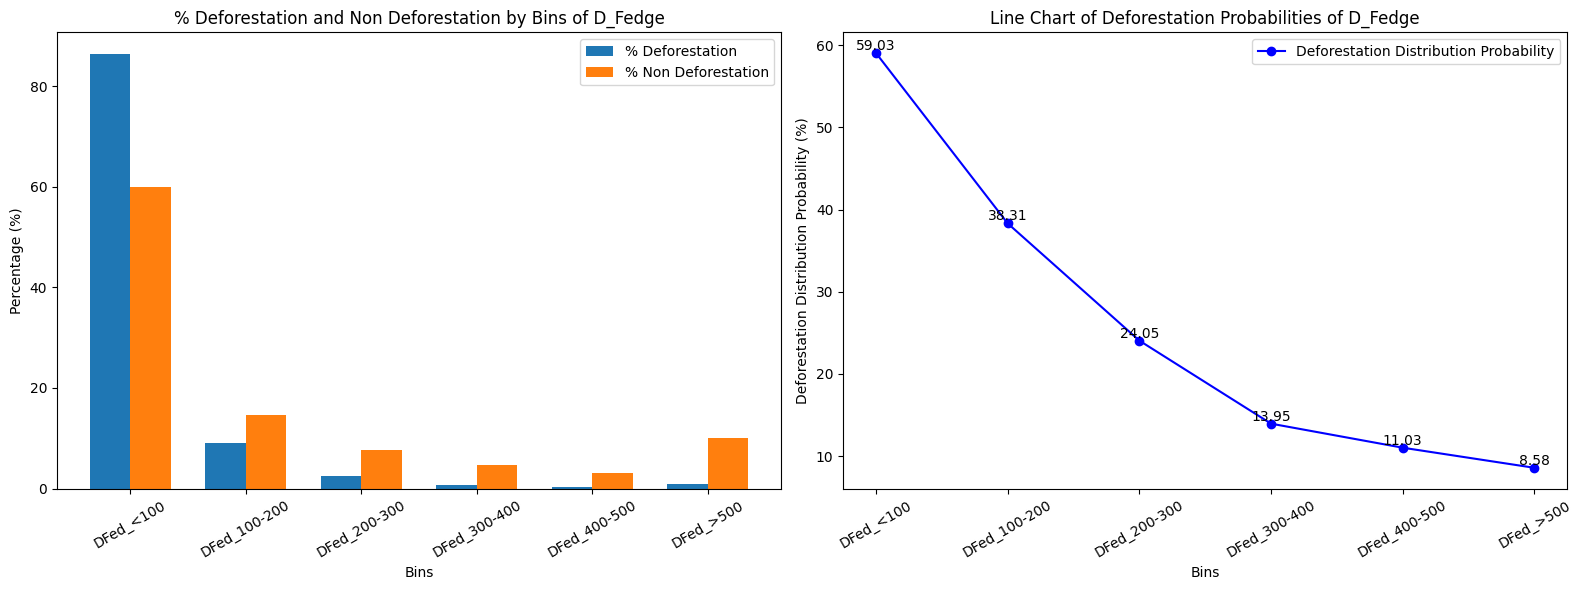

In [129]:
# --- Bar Chart ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns of plots

labels = DFedge_woe.index
percent_1 = DFedge_woe['% 1']
percent_0 = DFedge_woe['% 0']

width = 0.35
x = np.arange(len(labels))

ax1.bar(x - width/2, percent_1, width, label='% Deforestation')
ax1.bar(x + width/2, percent_0, width, label='% Non Deforestation')

ax1.set_xlabel('Bins')
ax1.set_ylabel('Percentage (%)')
ax1.set_title('% Deforestation and Non Deforestation by Bins of D_Fedge')
ax1.set_xticks(x)
ax1.set_xticklabels(labels,rotation=30)
ax1.legend()

# --- Line Chart ---
ax2.plot(DFedge_woe.index, DFedge_woe['dist_def_probs'], marker='o', linestyle='-', color='b', label='Deforestation Distribution Probability')

# Annotating the labels
for i, label in enumerate(DFedge_woe['dist_def_probs']):
    ax2.text(i, label, f"{label:.2f}", ha='center', va='bottom')

ax2.set_xlabel('Bins')
ax2.set_ylabel('Deforestation Distribution Probability (%)')
ax2.set_title('Line Chart of Deforestation Probabilities of D_Fedge')
ax2.set_xticklabels(labels, rotation = 30)
ax2.legend()

plt.tight_layout()  # Adjusts spacing between plots
plt.show()

### 5. Elevation

In [130]:
# WoE Elevation
elev_woe = calculate_woe_iv(df_reclassified, 'elevation_label')
elev_woe

defo,0,1,sum_bin,dist_def_probs,dist_nodef_probs,% 0,% 1,WoE,IV,elevation_label
elevation_label,,,,,,,,,,
Elev_<100,1658,2410,4068,59.242871,0.407571,42.038540,61.074506,0.373508,0.071101,Elev_<100
Elev_100-200,706,1283,1989,64.504776,0.354952,17.900609,32.513938,0.596834,0.087217,Elev_100-200
Elev_200-300,375,205,580,35.344828,0.646552,9.508114,5.195134,-0.604423,0.026069,Elev_200-300
Elev_300-400,289,30,319,9.404389,0.905956,7.327586,0.760264,-2.265736,0.148798,Elev_300-400
Elev_400-500,226,9,235,3.829787,0.961702,5.730223,0.228079,-3.223817,0.177379,Elev_400-500
Elev_>500,690,9,699,1.287554,0.987124,17.494929,0.228079,-4.339974,0.749377,Elev_>500


/tmp/ipykernel_2420/3060103743.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(labels, rotation = 30)


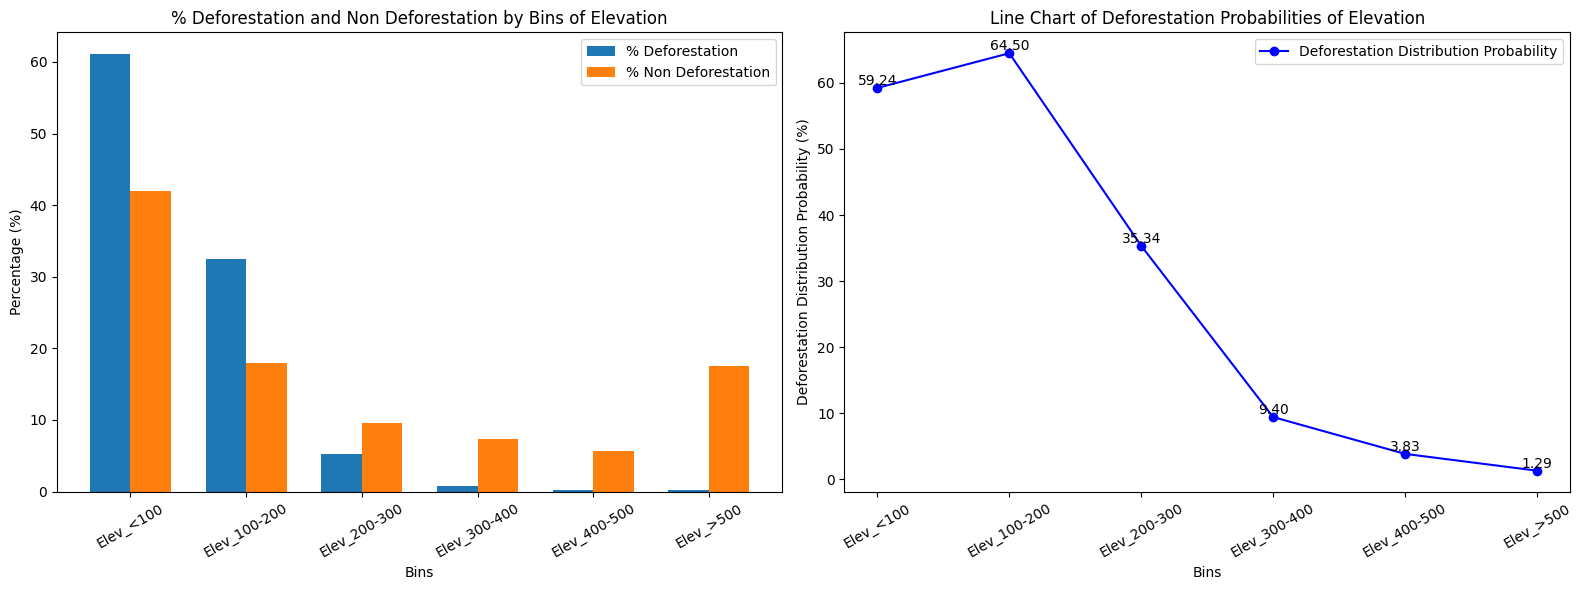

In [131]:
# --- Bar Chart ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns of plots

labels = elev_woe.index
percent_1 = elev_woe['% 1']
percent_0 = elev_woe['% 0']

width = 0.35
x = np.arange(len(labels))

ax1.bar(x - width/2, percent_1, width, label='% Deforestation')
ax1.bar(x + width/2, percent_0, width, label='% Non Deforestation')

ax1.set_xlabel('Bins')
ax1.set_ylabel('Percentage (%)')
ax1.set_title('% Deforestation and Non Deforestation by Bins of Elevation')
ax1.set_xticks(x)
ax1.set_xticklabels(labels, rotation=30)
ax1.legend()

# --- Line Chart ---
ax2.plot(elev_woe.index, elev_woe['dist_def_probs'], marker='o', linestyle='-', color='b', label='Deforestation Distribution Probability')

# Annotating the labels
for i, label in enumerate(elev_woe['dist_def_probs']):
    ax2.text(i, label, f"{label:.2f}", ha='center', va='bottom')

ax2.set_xlabel('Bins')
ax2.set_ylabel('Deforestation Distribution Probability (%)')
ax2.set_title('Line Chart of Deforestation Probabilities of Elevation')
ax2.set_xticklabels(labels, rotation = 30)
ax2.legend()

plt.tight_layout()  # Adjusts spacing between plots
plt.show()

### 6. Slope

In [132]:
# WoE Slope
slope_woe = calculate_woe_iv(df_reclassified, 'slope_label')
slope_woe.sort_values(by='WoE', ascending=False)

defo,0,1,sum_bin,dist_def_probs,dist_nodef_probs,% 0,% 1,WoE,IV,slope_label
slope_label,,,,,,,,,,
Slpe_5-15,1438,1995,3433,58.112438,0.418876,36.451204,50.557527,0.327137,0.046147,Slpe_5-15
Slpe_<5,1202,1188,2390,49.707113,0.502929,30.468948,30.106437,-0.011969,0.000043,Slpe_<5
Slpe_15-20,503,414,917,45.147219,0.548528,12.750317,10.491637,-0.194978,0.004404,Slpe_15-20
Slpe_20-25,337,204,541,37.707948,0.622921,8.542459,5.169792,-0.502216,0.016938,Slpe_20-25
Slpe_25-30,206,93,299,31.103679,0.688963,5.221800,2.356817,-0.795530,0.022792,Slpe_25-30
Slpe_>30,259,52,311,16.720257,0.832797,6.565272,1.317790,-1.605838,0.084266,Slpe_>30


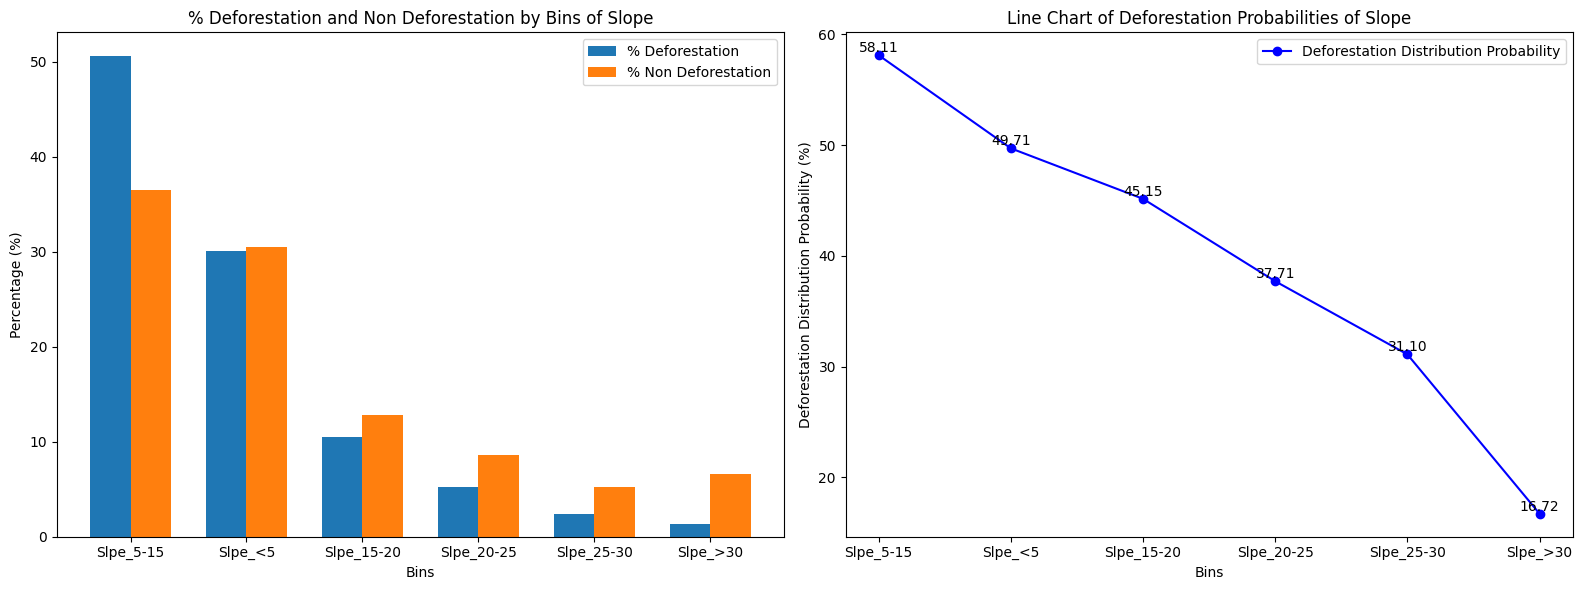

In [133]:
slope_woe = slope_woe.sort_values(by='% 1', ascending=False)

# --- Bar Chart ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns of plots

labels = slope_woe.index
percent_1 = slope_woe['% 1']
percent_0 = slope_woe['% 0']

width = 0.35
x = np.arange(len(labels))

ax1.bar(x - width/2, percent_1, width, label='% Deforestation')
ax1.bar(x + width/2, percent_0, width, label='% Non Deforestation')

ax1.set_xlabel('Bins')
ax1.set_ylabel('Percentage (%)')
ax1.set_title('% Deforestation and Non Deforestation by Bins of Slope')
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.legend()

# --- Line Chart ---
ax2.plot(slope_woe.index, slope_woe['dist_def_probs'], marker='o', linestyle='-', color='b', label='Deforestation Distribution Probability')

# Annotating the labels
for i, label in enumerate(slope_woe['dist_def_probs']):
    ax2.text(i, label, f"{label:.2f}", ha='center', va='bottom')

ax2.set_xlabel('Bins')
ax2.set_ylabel('Deforestation Distribution Probability (%)')
ax2.set_title('Line Chart of Deforestation Probabilities of Slope')
ax2.legend()

plt.tight_layout()  # Adjusts spacing between plots
plt.show()

### 7. Geology Type

In [134]:
# WoE Geology Type
geotype_woe = calculate_woe_iv(df_reclassified, 'geotype_label')

# Replace infinite values with NaN
geotype_woe.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values
geotype_woe.dropna(inplace=True)

# Sort the DataFrame
geotype_woe.sort_values(by='WoE', ascending=False, inplace=True)

geotype_woe

/home/simon/phl-caraga-apd/env/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


defo,0,1,sum_bin,dist_def_probs,dist_nodef_probs,% 0,% 1,WoE,IV,geotype_label
geotype_label,,,,,,,,,,
"geotype_Gneiss,_schist,_phyllites-slates",11,25,36,69.444444,0.305556,0.278834,0.633553,0.820727,0.002911,"geotype_Gneiss,_schist,_phyllites-slates"
geotype_Pliocene-Pleistocene_Limestone,196,319,515,61.941748,0.380583,4.968314,8.084136,0.486823,0.015169,geotype_Pliocene-Pleistocene_Limestone
"geotype_Sandstone,_shales,_reef_limestone",691,1005,1696,59.257075,0.407429,17.515843,25.468829,0.374350,0.029772,"geotype_Sandstone,_shales,_reef_limestone"
"geotype_Sandstone-shale,_spilites",5,7,12,58.333333,0.416667,0.126743,0.177395,0.336219,0.000170,"geotype_Sandstone-shale,_spilites"
"geotype_Marl,_reworked_tuff,_pyroclastic",843,1146,1989,57.616893,0.423831,21.368821,29.042068,0.306812,0.023542,"geotype_Marl,_reworked_tuff,_pyroclastic"
"geotype_Limestone,_sandstone,_shale",312,378,690,54.782609,0.452174,7.908745,9.579321,0.191638,0.003201,"geotype_Limestone,_sandstone,_shale"
"geotype_Sandstone,_shales,_conglomerate",27,28,55,50.909091,0.490909,0.684411,0.709579,0.036114,0.000009,"geotype_Sandstone,_shales,_conglomerate"
geotype_Spilitic_and_basic_flows,42,43,85,50.588235,0.494118,1.064639,1.089711,0.023277,0.000006,geotype_Spilitic_and_basic_flows
geotype_NoData,46,44,90,48.888889,0.511111,1.166033,1.115053,-0.044705,0.000023,geotype_NoData


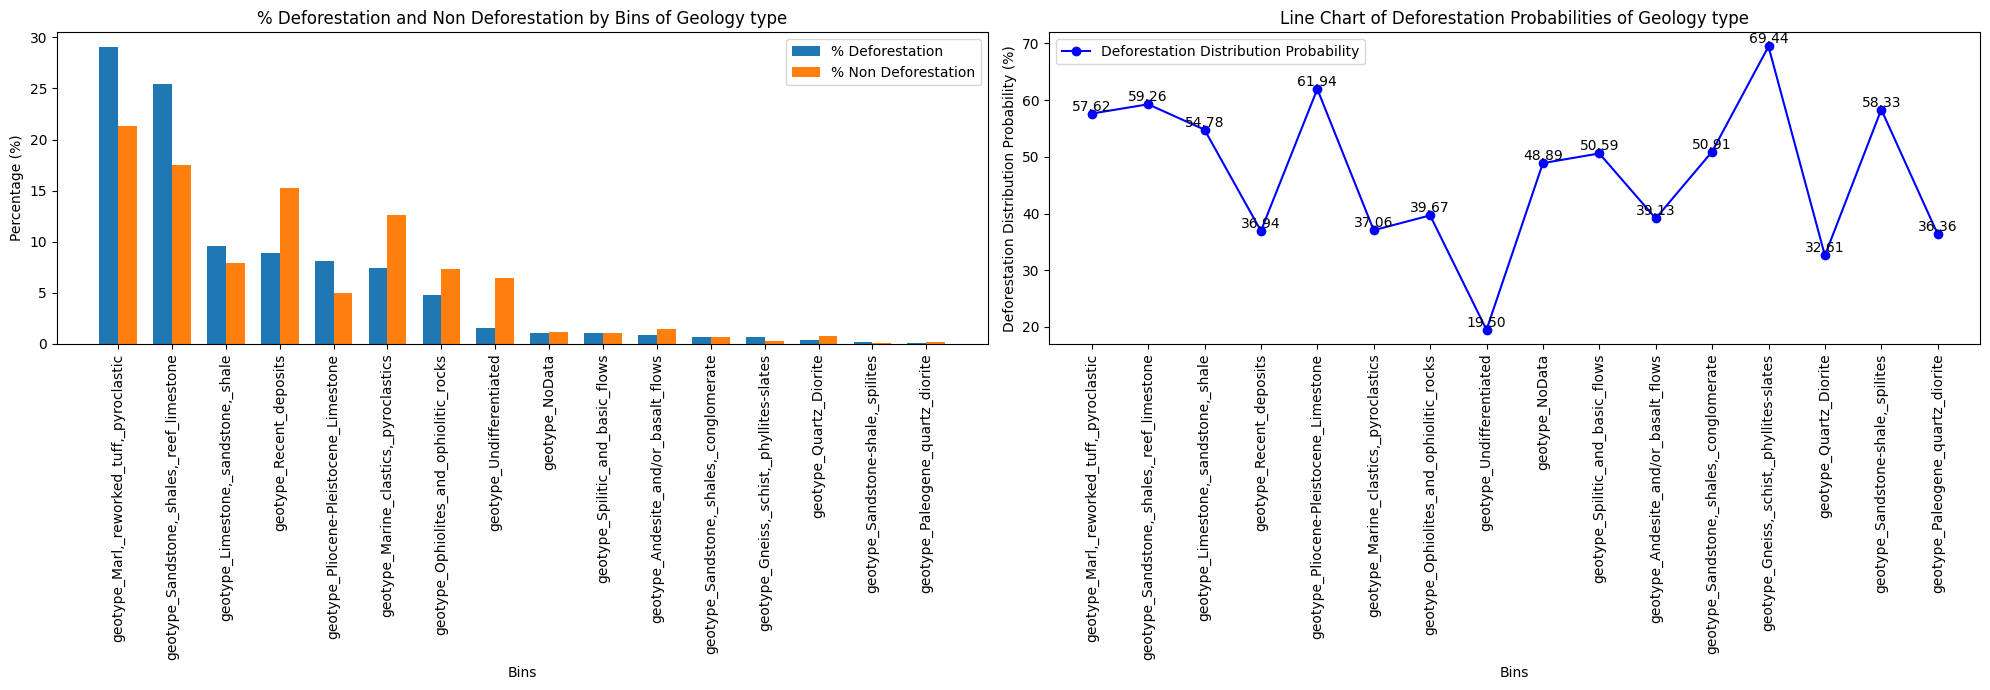

In [135]:
geotype_woe = geotype_woe.sort_values(by='% 1', ascending=False)

# --- Bar Chart ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))  # 1 row, 2 columns of plots

labels = geotype_woe.index
percent_1 = geotype_woe['% 1']
percent_0 = geotype_woe['% 0']

width = 0.35
x = np.arange(len(labels))

ax1.bar(x - width/2, percent_1, width, label='% Deforestation')
ax1.bar(x + width/2, percent_0, width, label='% Non Deforestation')

ax1.set_xlabel('Bins')
ax1.set_ylabel('Percentage (%)')
ax1.set_title('% Deforestation and Non Deforestation by Bins of Geology type')
ax1.set_xticks(x)
ax1.set_xticklabels(labels,rotation=90)
ax1.legend()

# --- Line Chart ---
ax2.plot(geotype_woe.index, geotype_woe['dist_def_probs'], marker='o', linestyle='-', color='b', label='Deforestation Distribution Probability')

# Annotating the labels
for i, label in enumerate(geotype_woe['dist_def_probs']):
    ax2.text(i, label, f"{label:.2f}", ha='center', va='bottom')

ax2.set_xlabel('Bins')
ax2.set_ylabel('Deforestation Distribution Probability (%)')
ax2.set_title('Line Chart of Deforestation Probabilities of Geology type')
ax2.set_xticks(x)
ax2.set_xticklabels(labels,rotation=90)
ax2.legend()

plt.tight_layout()  # Adjusts spacing between plots
plt.show()

### 8. Mining Rights

In [45]:
# # WoE Geology Type
# mineright_woe = calculate_woe_iv(df_reclassified, 'mineright_label')
# mineright_woe

In [47]:
# # --- Bar Chart ---
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))  # 1 row, 2 columns of plots

# labels = mineright_woe.index
# percent_1 = mineright_woe['% 1']
# percent_0 = mineright_woe['% 0']

# width = 0.35
# x = np.arange(len(labels))

# ax1.bar(x - width/2, percent_1, width, label='% Deforestation')
# ax1.bar(x + width/2, percent_0, width, label='% Non Deforestation')

# ax1.set_xlabel('Bins')
# ax1.set_ylabel('Percentage (%)')
# ax1.set_title('% Deforestation and Non Deforestation by Bins of Mining Rights')
# ax1.set_xticks(x)
# ax1.set_xticklabels(labels)
# ax1.legend()

# # --- Line Chart ---
# ax2.plot(mineright_woe.index, mineright_woe['dist_def_probs'], marker='o', linestyle='-', color='b', label='Deforestation Distribution Probability')

# # Annotating the labels
# for i, label in enumerate(mineright_woe['dist_def_probs']):
#     ax2.text(i, label, f"{label:.2f}", ha='center', va='bottom')

# ax2.set_xlabel('Bins')
# ax2.set_ylabel('Deforestation Distribution Probability (%)')
# ax2.set_title('Line Chart of Deforestation Probabilities of Mining Rights')
# ax2.legend()

# plt.tight_layout()  # Adjusts spacing between plots
# plt.show()

# 9. Soil Type

In [136]:
# WoE Geology Type
# WoE Geology Type
soiltype_woe = calculate_woe_iv(df_reclassified, 'soiltype_label')

# Replace infinite values with NaN
soiltype_woe.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values
soiltype_woe.dropna(inplace=True)

# Sort the DataFrame
soiltype_woe.sort_values(by='WoE', ascending=False, inplace=True)

soiltype_woe

/home/simon/phl-caraga-apd/env/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


defo,0,1,sum_bin,dist_def_probs,dist_nodef_probs,% 0,% 1,WoE,IV,soiltype_label
soiltype_label,,,,,,,,,,
soiltype_Jasaan_silt_loam_Jasaan_clay_loam,4,14,18,77.777778,0.222222,0.101394,0.354790,1.252510,0.003174,soiltype_Jasaan_silt_loam_Jasaan_clay_loam
soiltype_Malalag_loam,41,131,172,76.162791,0.238372,1.039290,3.319818,1.161372,0.026485,soiltype_Malalag_loam
soiltype_Guadalupe_clay,3,9,12,75.000000,0.250000,0.076046,0.228079,1.098359,0.001670,soiltype_Guadalupe_clay
soiltype_Bad_as_sandy_loam,12,32,44,72.727273,0.272727,0.304183,0.810948,0.980576,0.004969,soiltype_Bad_as_sandy_loam
soiltype_Umingan_clay_loam,2,5,7,71.428571,0.285714,0.050697,0.126711,0.916037,0.000696,soiltype_Umingan_clay_loam
soiltype_Bolinao_clay_loam,181,423,604,70.033113,0.299669,4.588086,10.719716,0.848622,0.052034,soiltype_Bolinao_clay_loam
soiltype_Kidapawan_loam,125,290,415,69.879518,0.301205,3.168568,7.349214,0.841314,0.035172,soiltype_Kidapawan_loam
soiltype_Camansa_clay,340,698,1038,67.244701,0.327553,8.618504,17.688799,0.719020,0.065217,soiltype_Camansa_clay
soiltype_Kicharo_clay_loam,1,2,3,66.666667,0.333333,0.025349,0.050684,0.692894,0.000176,soiltype_Kicharo_clay_loam


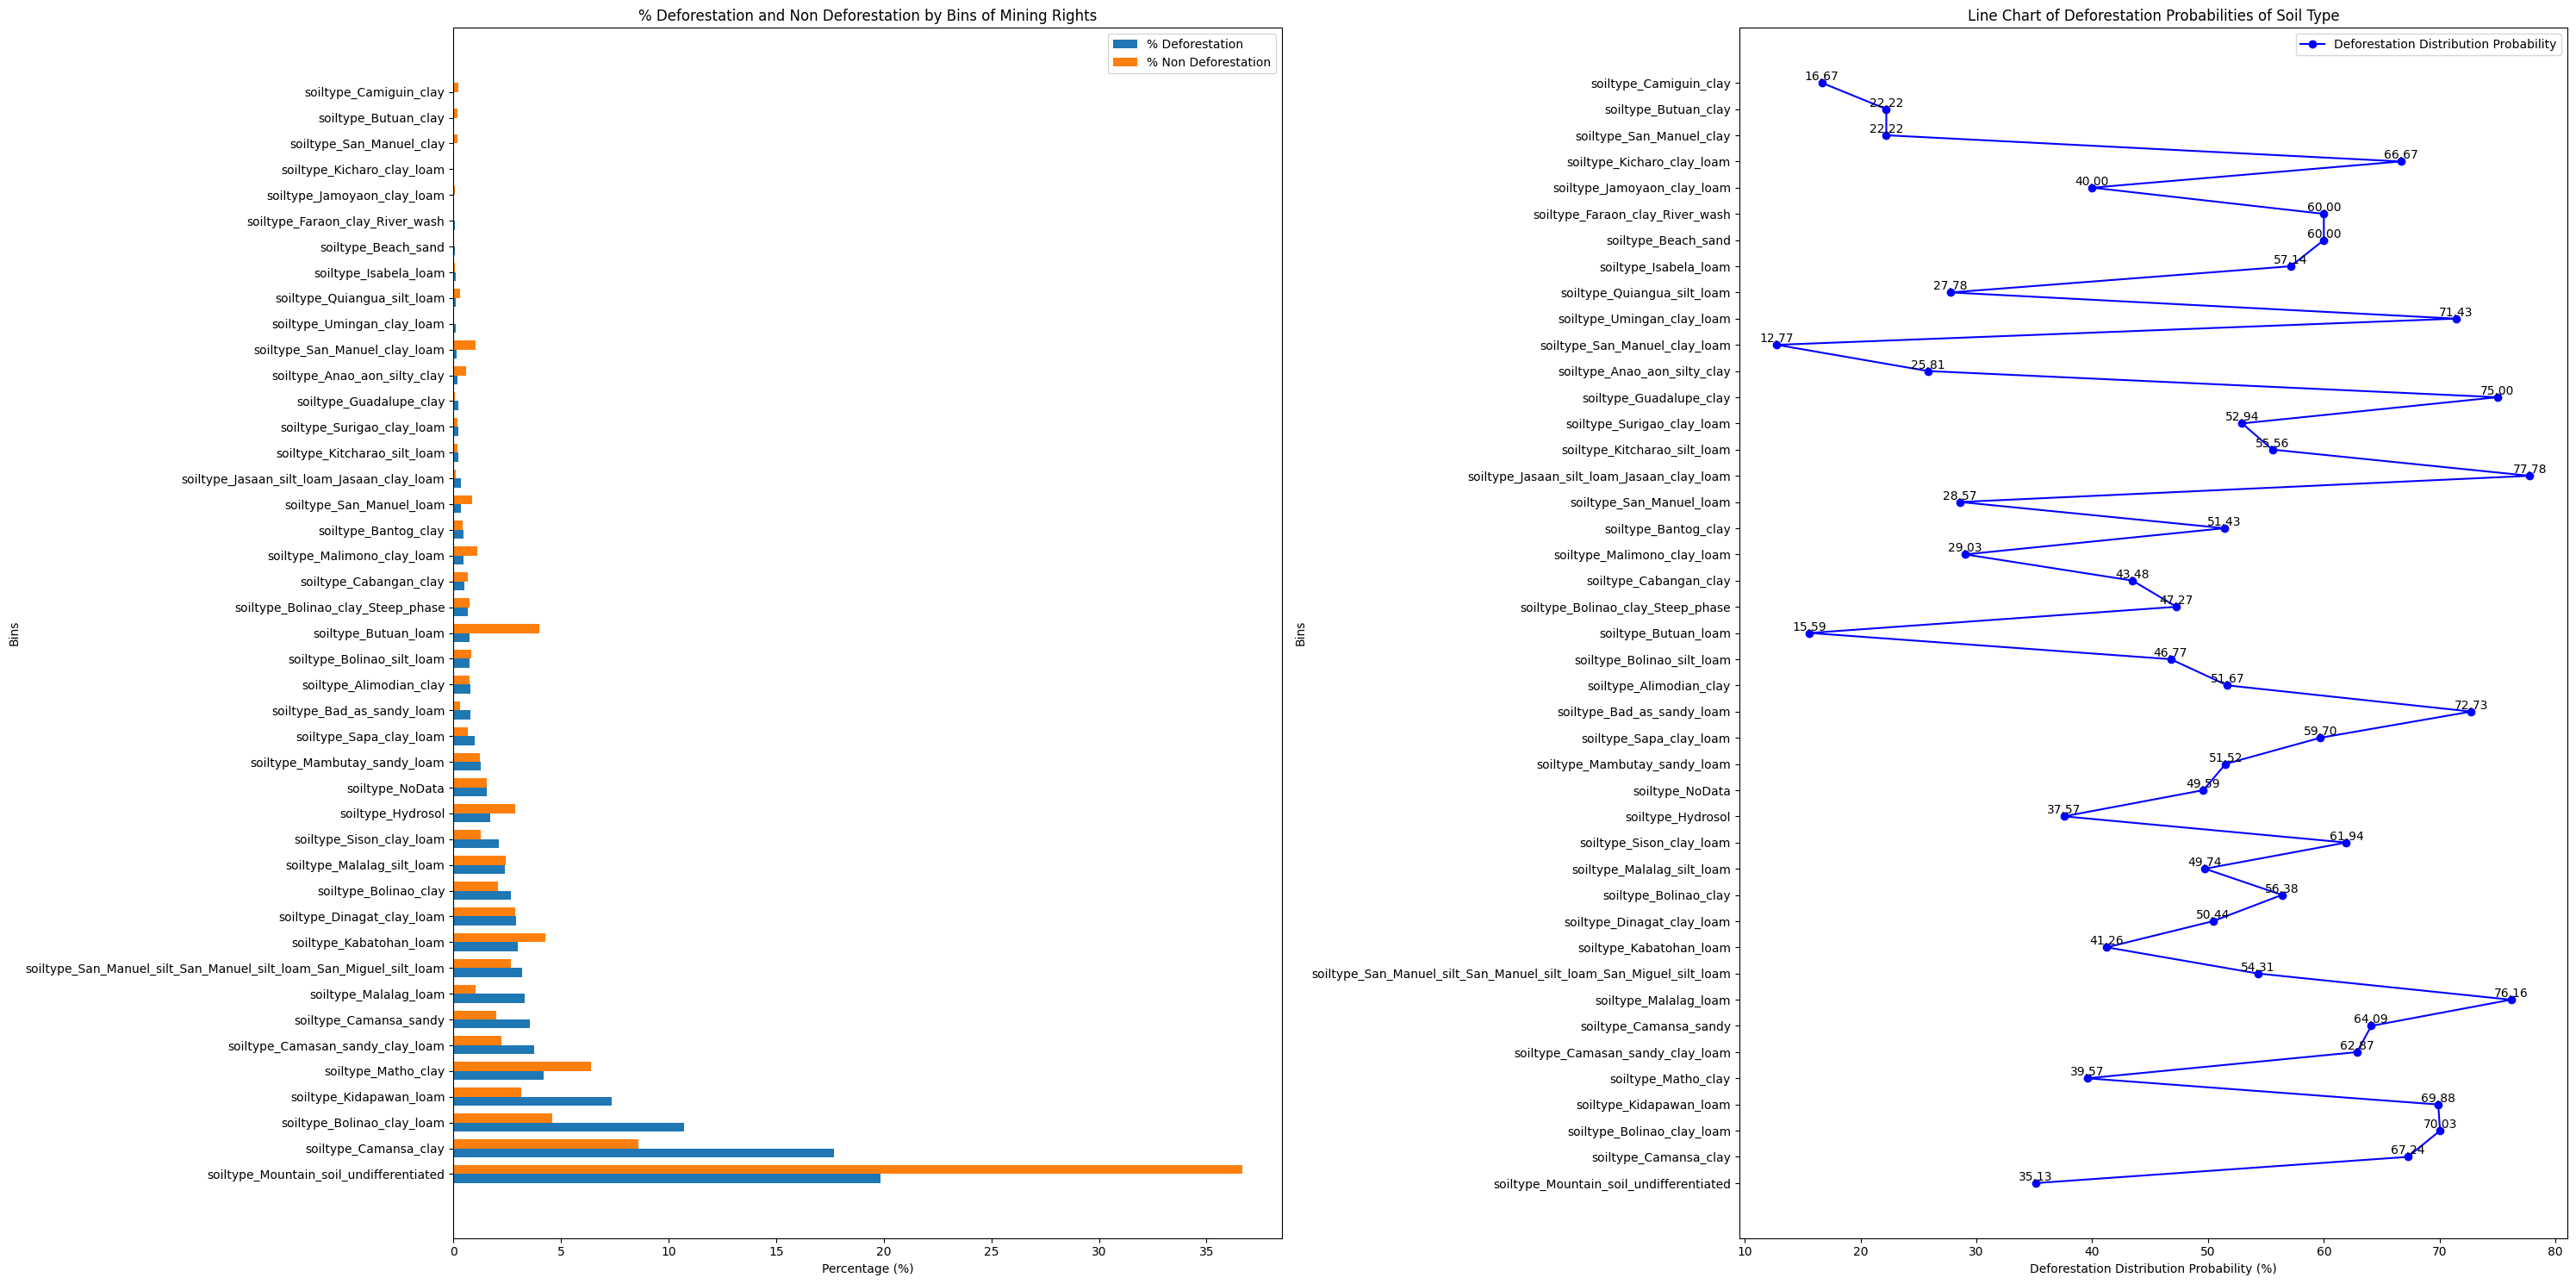

In [137]:
# Sort the DataFrame from high to low based on '% 1'
soiltype_woe = soiltype_woe.sort_values(by='% 1', ascending=False)

# Now you can plot your data as before
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30,15))  # 1 row, 2 columns of plots

labels = soiltype_woe.index
percent_1 = soiltype_woe['% 1']
percent_0 = soiltype_woe['% 0']

width = 0.35
y = np.arange(len(labels))

ax1.barh(y - width/2, percent_1, width, label='% Deforestation')
ax1.barh(y + width/2, percent_0, width, label='% Non Deforestation')

ax1.set_ylabel('Bins')
ax1.set_xlabel('Percentage (%)')
ax1.set_title('% Deforestation and Non Deforestation by Bins of Mining Rights')
ax1.set_yticks(y)
ax1.set_yticklabels(labels)
ax1.legend()

# --- Line Chart ---
ax2.plot(soiltype_woe['dist_def_probs'], soiltype_woe.index, marker='o', linestyle='-', color='b', label='Deforestation Distribution Probability')

# Annotating the labels
for i, label in enumerate(soiltype_woe['dist_def_probs']):
    ax2.text(label, i, f"{label:.2f}", ha='center', va='bottom')

ax2.set_ylabel('Bins')
ax2.set_xlabel('Deforestation Distribution Probability (%)')
ax2.set_title('Line Chart of Deforestation Probabilities of Soil Type')
ax2.set_yticks(y)
ax2.set_yticklabels(labels)
ax2.legend()

plt.tight_layout()  # Adjusts spacing between plots
plt.show()

# 10. Protected Area

In [138]:
# WoE Geology Type
protectedarea_woe = calculate_woe_iv(df_reclassified, 'protectedarea_label')
protectedarea_woe

defo,0,1,sum_bin,dist_def_probs,dist_nodef_probs,% 0,% 1,WoE,IV,protectedarea_label
protectedarea_label,,,,,,,,,,
PArea_No,3526,3682,7208,51.082131,0.489179,89.378961,93.309681,0.043039,0.001692,PArea_No
PArea_Yes,419,264,683,38.653001,0.613470,10.621039,6.690319,-0.462175,0.018167,PArea_Yes


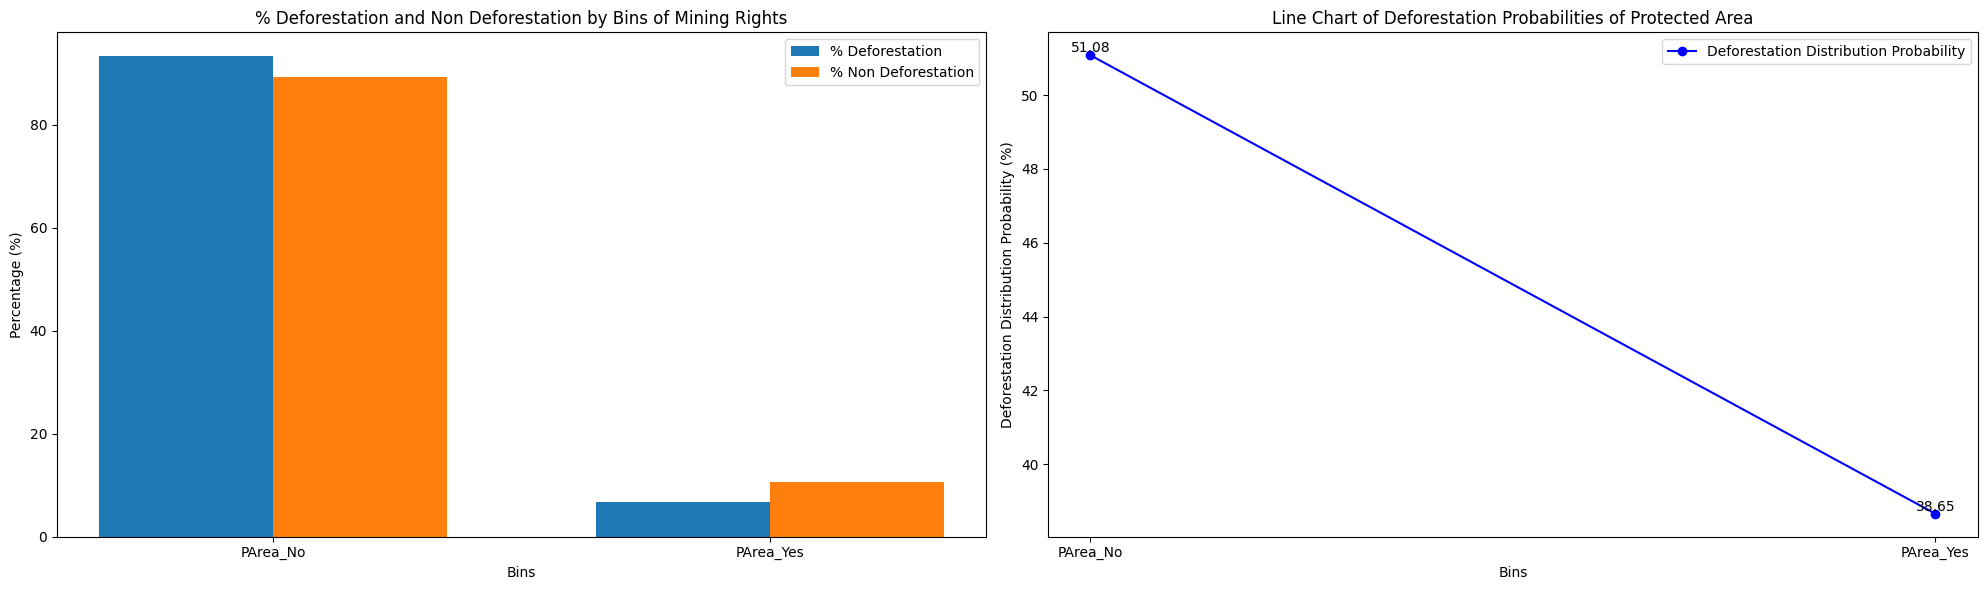

In [139]:
# --- Bar Chart ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))  # 1 row, 2 columns of plots

labels = protectedarea_woe.index
percent_1 = protectedarea_woe['% 1']
percent_0 = protectedarea_woe['% 0']

width = 0.35
x = np.arange(len(labels))

ax1.bar(x - width/2, percent_1, width, label='% Deforestation')
ax1.bar(x + width/2, percent_0, width, label='% Non Deforestation')

ax1.set_xlabel('Bins')
ax1.set_ylabel('Percentage (%)')
ax1.set_title('% Deforestation and Non Deforestation by Bins of Protected Area')
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.legend()

# --- Line Chart ---
ax2.plot(protectedarea_woe.index, protectedarea_woe['dist_def_probs'], marker='o', linestyle='-', color='b', label='Deforestation Distribution Probability')

# Annotating the labels
for i, label in enumerate(protectedarea_woe['dist_def_probs']):
    ax2.text(i, label, f"{label:.2f}", ha='center', va='bottom')

ax2.set_xlabel('Bins')
ax2.set_ylabel('Deforestation Distribution Probability (%)')
ax2.set_title('Line Chart of Deforestation Probabilities of Protected Area')
ax2.legend()

plt.tight_layout()  # Adjusts spacing between plots
plt.show()

In [140]:
# WoE Temperature
temperature_woe = calculate_woe_iv(df_reclassified, 'temperature_label')

# Replace infinite values with NaN
temperature_woe.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values
temperature_woe.dropna(inplace=True)

# Sort the DataFrame
temperature_woe.sort_values(by='WoE', ascending=False, inplace=True)

temperature_woe

/home/simon/phl-caraga-apd/env/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


defo,0,1,sum_bin,dist_def_probs,dist_nodef_probs,% 0,% 1,WoE,IV,temperature_label
temperature_label,,,,,,,,,,
Temp_27-29,1741,2909,4650,62.559140,0.374409,44.131812,73.720223,0.513096,0.151817,Temp_27-29
Temp_29-32,688,594,1282,46.333853,0.536661,17.439797,15.053218,-0.147163,0.003512,Temp_29-32
Temp_25-27,1141,440,1581,27.830487,0.721695,28.922687,11.150532,-0.953139,0.169393,Temp_25-27
Temp_23-25,314,3,317,0.946372,0.990536,7.959442,0.076026,-4.651034,0.366660,Temp_23-25


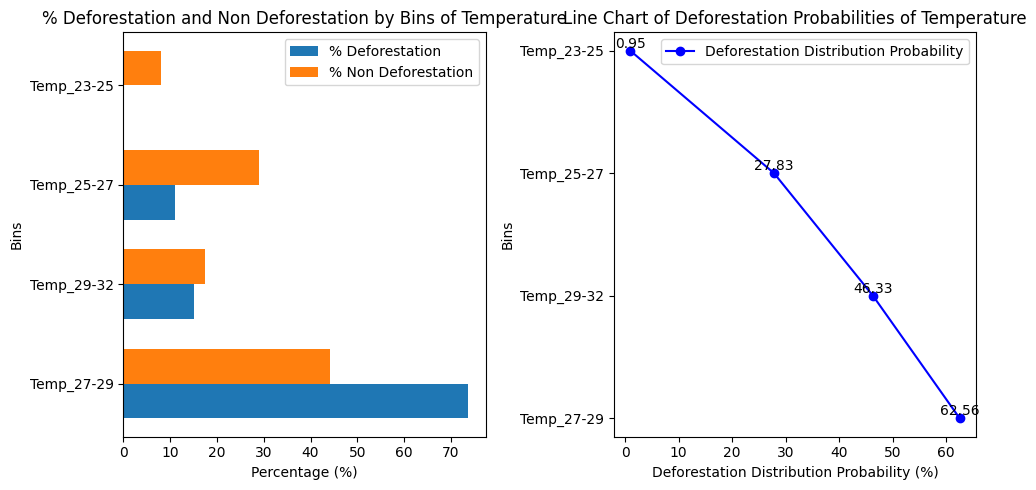

In [145]:
# Sort the DataFrame from high to low based on '% 1'
temperature_woe = temperature_woe.sort_values(by='% 1', ascending=False)

# Now you can plot your data as before
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))  # 1 row, 2 columns of plots

labels = temperature_woe.index
percent_1 = temperature_woe['% 1']
percent_0 = temperature_woe['% 0']

width = 0.35
y = np.arange(len(labels))

ax1.barh(y - width/2, percent_1, width, label='% Deforestation')
ax1.barh(y + width/2, percent_0, width, label='% Non Deforestation')

ax1.set_ylabel('Bins')
ax1.set_xlabel('Percentage (%)')
ax1.set_title('% Deforestation and Non Deforestation by Bins of Temperature')
ax1.set_yticks(y)
ax1.set_yticklabels(labels)
ax1.legend()

# --- Line Chart ---
ax2.plot(temperature_woe['dist_def_probs'], temperature_woe.index, marker='o', linestyle='-', color='b', label='Deforestation Distribution Probability')

# Annotating the labels
for i, label in enumerate(temperature_woe['dist_def_probs']):
    ax2.text(label, i, f"{label:.2f}", ha='center', va='bottom')

ax2.set_ylabel('Bins')
ax2.set_xlabel('Deforestation Distribution Probability (%)')
ax2.set_title('Line Chart of Deforestation Probabilities of Temperature')
ax2.set_yticks(y)
ax2.set_yticklabels(labels)
ax2.legend()

plt.tight_layout()  # Adjusts spacing between plots
plt.show()

In [148]:
# WoE Temperature
rainfall_woe = calculate_woe_iv(df_reclassified, 'rainfall_label')

# Replace infinite values with NaN
rainfall_woe.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values
rainfall_woe.dropna(inplace=True)

# Sort the DataFrame
rainfall_woe.sort_values(by='WoE', ascending=False, inplace=True)

rainfall_woe

/home/simon/phl-caraga-apd/env/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


defo,0,1,sum_bin,dist_def_probs,dist_nodef_probs,% 0,% 1,WoE,IV,rainfall_label
rainfall_label,,,,,,,,,,
Rain_2150-2450,167,193,360,53.611111,0.463889,4.233207,4.891029,0.144443,0.000950,Rain_2150-2450
Rain_2450-2750,771,801,1572,50.954198,0.490458,19.543726,20.299037,0.037919,0.000286,Rain_2450-2750
Rain_2750-3440,2890,2902,5792,50.103591,0.498964,73.257288,73.542828,0.003890,0.000011,Rain_2750-3440
Rain_1850-2150,51,50,101,49.504950,0.504950,1.292776,1.267106,-0.020056,0.000005,Rain_1850-2150


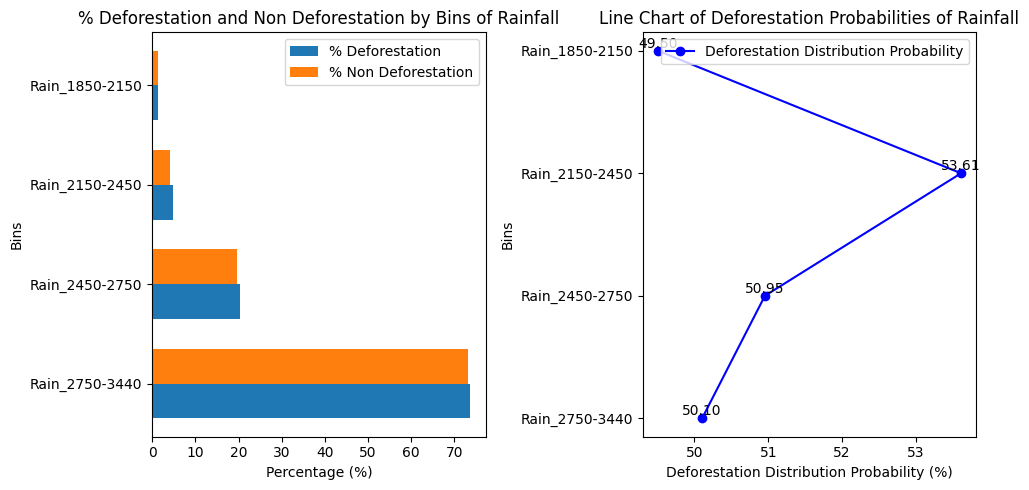

In [149]:
# Sort the DataFrame from high to low based on '% 1'
rainfall_woe = rainfall_woe.sort_values(by='% 1', ascending=False)

# Now you can plot your data as before
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))  # 1 row, 2 columns of plots

labels = rainfall_woe.index
percent_1 = rainfall_woe['% 1']
percent_0 = rainfall_woe['% 0']

width = 0.35
y = np.arange(len(labels))

ax1.barh(y - width/2, percent_1, width, label='% Deforestation')
ax1.barh(y + width/2, percent_0, width, label='% Non Deforestation')

ax1.set_ylabel('Bins')
ax1.set_xlabel('Percentage (%)')
ax1.set_title('% Deforestation and Non Deforestation by Bins of Rainfall')
ax1.set_yticks(y)
ax1.set_yticklabels(labels)
ax1.legend()

# --- Line Chart ---
ax2.plot(rainfall_woe['dist_def_probs'], rainfall_woe.index, marker='o', linestyle='-', color='b', label='Deforestation Distribution Probability')

# Annotating the labels
for i, label in enumerate(rainfall_woe['dist_def_probs']):
    ax2.text(label, i, f"{label:.2f}", ha='center', va='bottom')

ax2.set_ylabel('Bins')
ax2.set_xlabel('Deforestation Distribution Probability (%)')
ax2.set_title('Line Chart of Deforestation Probabilities of Rainfall')
ax2.set_yticks(y)
ax2.set_yticklabels(labels)
ax2.legend()

plt.tight_layout()  # Adjusts spacing between plots
plt.show()

# Compute Total Information Value 

In [150]:
# Sum each of IV spatial determinants
river_IV_sum = river_woe['IV'].sum()
roads_IV_sum = roads_woe['IV'].sum()
village_IV_sum = village_woe['IV'].sum()
DFedge_IV_sum = DFedge_woe['IV'].sum()
elev_IV_sum = elev_woe['IV'].sum()
slope_IV_sum = slope_woe['IV'].sum()
geotype_IV_sum = geotype_woe['IV'].sum()
# mineright_IV_sum = mineright_woe['IV'].sum()
soiltype_IV_sum = soiltype_woe['IV'].sum()
protectedarea_IV_sum = protectedarea_woe['IV'].sum()
temperature_IV_sum = temperature_woe['IV'].sum()
rainfall_IV_sum = rainfall_woe['IV'].sum()

In [55]:
print(  'IV River', river_IV_sum,
        'IV Roads', roads_IV_sum,
        'IV Villages', village_IV_sum,
        'IV Forest Edge', DFedge_IV_sum,
        'IV Elevation', elev_IV_sum,
        'IV Slope', slope_IV_sum,
        'IV Geology Type', geotype_IV_sum,
        # 'IV Mining Rights', mineright_IV_sum,
        'IV Soil Type', soiltype_IV_sum,
        'IV Protected Area', protectedarea_IV_sum
        'IV Temperature', temperature_IV_sum,
        'IV Rainfall', rainfall_IV_sum
        )

IV River 0.003789 IV Roads 1.22847 IV Villages 0.5186949999999999 IV Forest Edge 0.524295 IV Elevation 1.259941 IV Slope 0.17459000000000002 IV Geology Type 0.22191999999999998 IV Soil Type 0.433573 IV Protected Area 0.019858999999999998


In [125]:
# List of columns that do not end with '_label'
non_label_columns = [column for column in df_reclassified.columns if not column.endswith('_label')]

# Ensure "deforestation" and "defo" are not in the list
non_label_columns = [column for column in non_label_columns if column != 'Deforestation' and column != 'defo']

# Print the selected columns
print(non_label_columns)

['D_fedge', 'D_road', 'D_rivers', 'D_villages', 'elevation', 'slope', 'geotype', 'soiltype', 'protectedarea', 'Intercept']


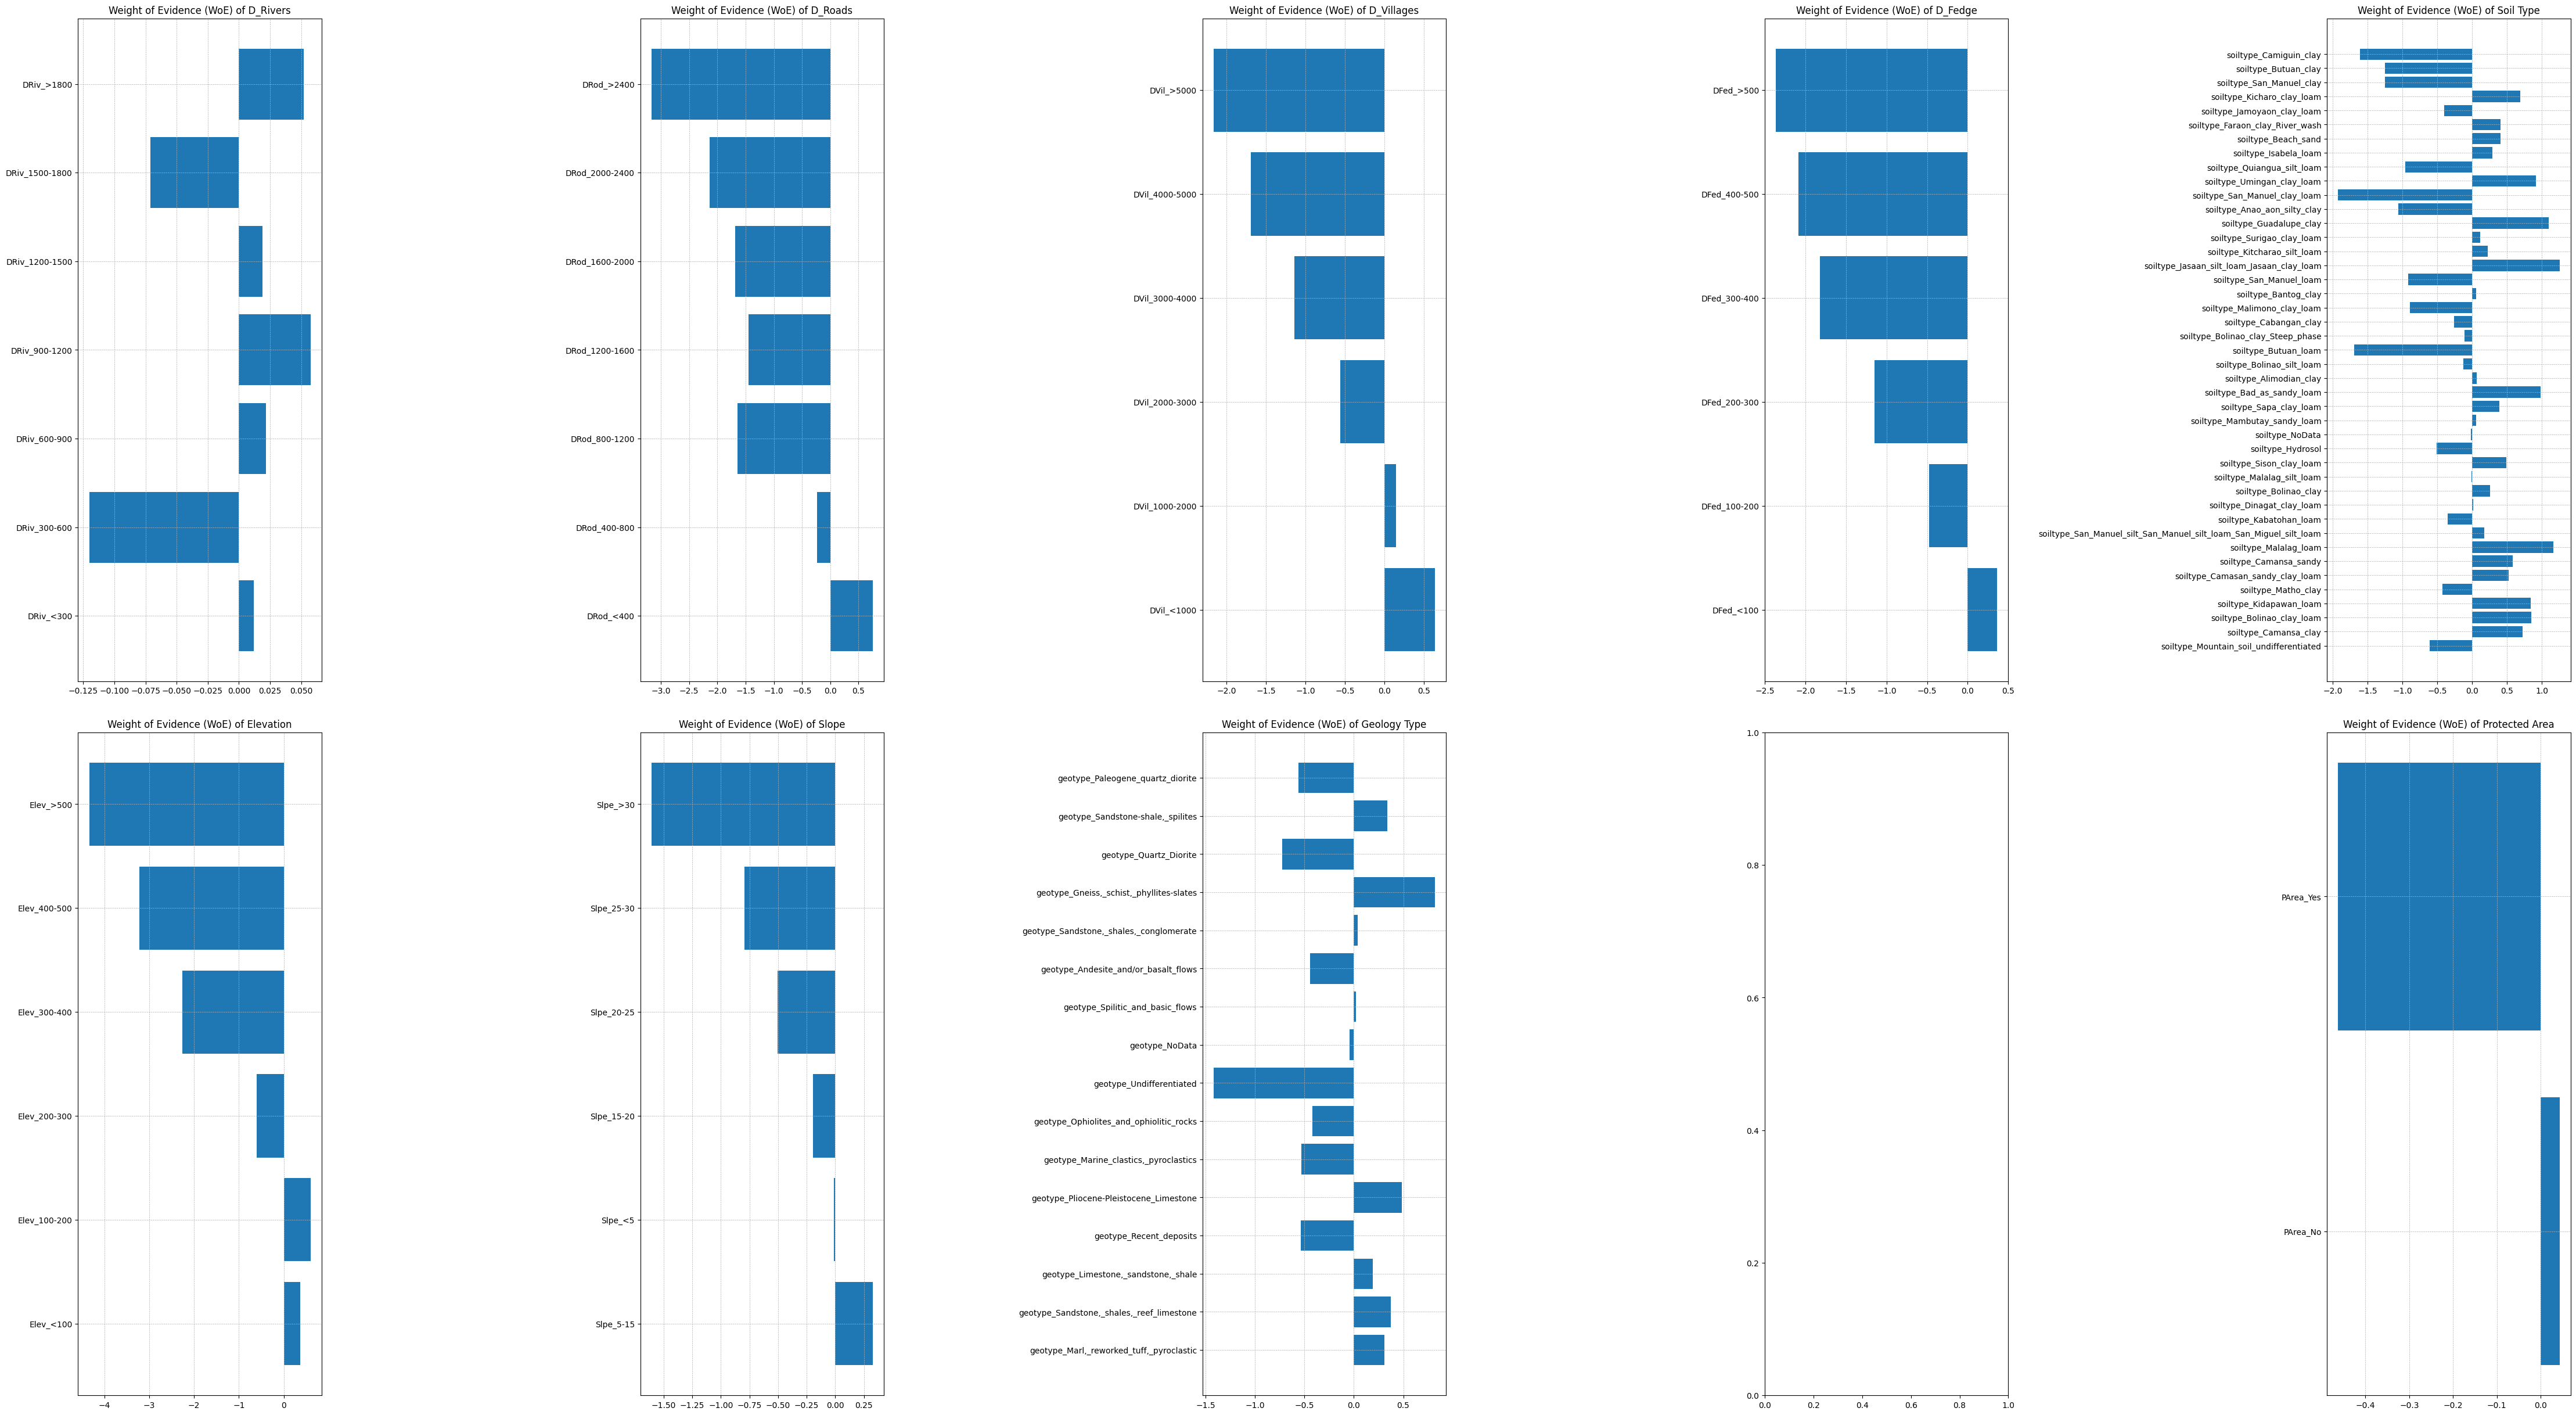

In [151]:
# Plot the total information value for each the variable
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(45, 25))

title = "Weight of Evidence (WoE)"
column_name = "WoE"

axes[0, 0].barh(y=river_woe["D_rivers_label"], width=river_woe[column_name])
axes[0, 0].set_title(title + " of D_Rivers")
axes[0, 0].grid(True, which='both', linestyle='--', linewidth=0.5)

axes[0, 1].barh(y=roads_woe["D_road_label"], width=roads_woe[column_name])
axes[0, 1].set_title(title + " of D_Roads")
axes[0, 1].grid(True, which='both', linestyle='--', linewidth=0.5)

axes[0, 2].barh(y=village_woe["D_villages_label"], width=village_woe[column_name])
axes[0, 2].set_title(title + " of D_Villages")
axes[0, 2].grid(True, which='both', linestyle='--', linewidth=0.5)

axes[0, 3].barh(y=DFedge_woe["D_fedge_label"], width=DFedge_woe[column_name])
axes[0, 3].set_title(title + " of D_Fedge")
axes[0, 3].grid(True, which='both', linestyle='--', linewidth=0.5)

axes[0, 4].barh(y=soiltype_woe["soiltype_label"], width=soiltype_woe[column_name])
axes[0, 4].set_title(title + " of Soil Type")
axes[0, 4].grid(True, which='both', linestyle='--', linewidth=0.5)

axes[1, 0].barh(y=elev_woe["elevation_label"], width=elev_woe[column_name])
axes[1, 0].set_title(title + " of Elevation")
axes[1, 0].grid(True, which='both', linestyle='--', linewidth=0.5)

axes[1, 1].barh(y=slope_woe["slope_label"], width=slope_woe[column_name])
axes[1, 1].set_title(title + " of Slope")
axes[1, 1].grid(True, which='both', linestyle='--', linewidth=0.5)

axes[1, 2].barh(y=geotype_woe["geotype_label"], width=geotype_woe[column_name])
axes[1, 2].set_title(title + " of Geology Type")
axes[1, 2].grid(True, which='both', linestyle='--', linewidth=0.5)

# axes[1, 3].barh(y=mineright_woe["mineright_label"], width=mineright_woe[column_name])
# axes[1, 3].set_title(title + " of Mining Rights")
# axes[1, 3].grid(True, which='both', linestyle='--', linewidth=0.5)

axes[1, 4].barh(y=protectedarea_woe["protectedarea_label"], width=protectedarea_woe[column_name])
axes[1, 4].set_title(title + " of Protected Area")
axes[1, 4].grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout(pad=3.0)
plt.show()

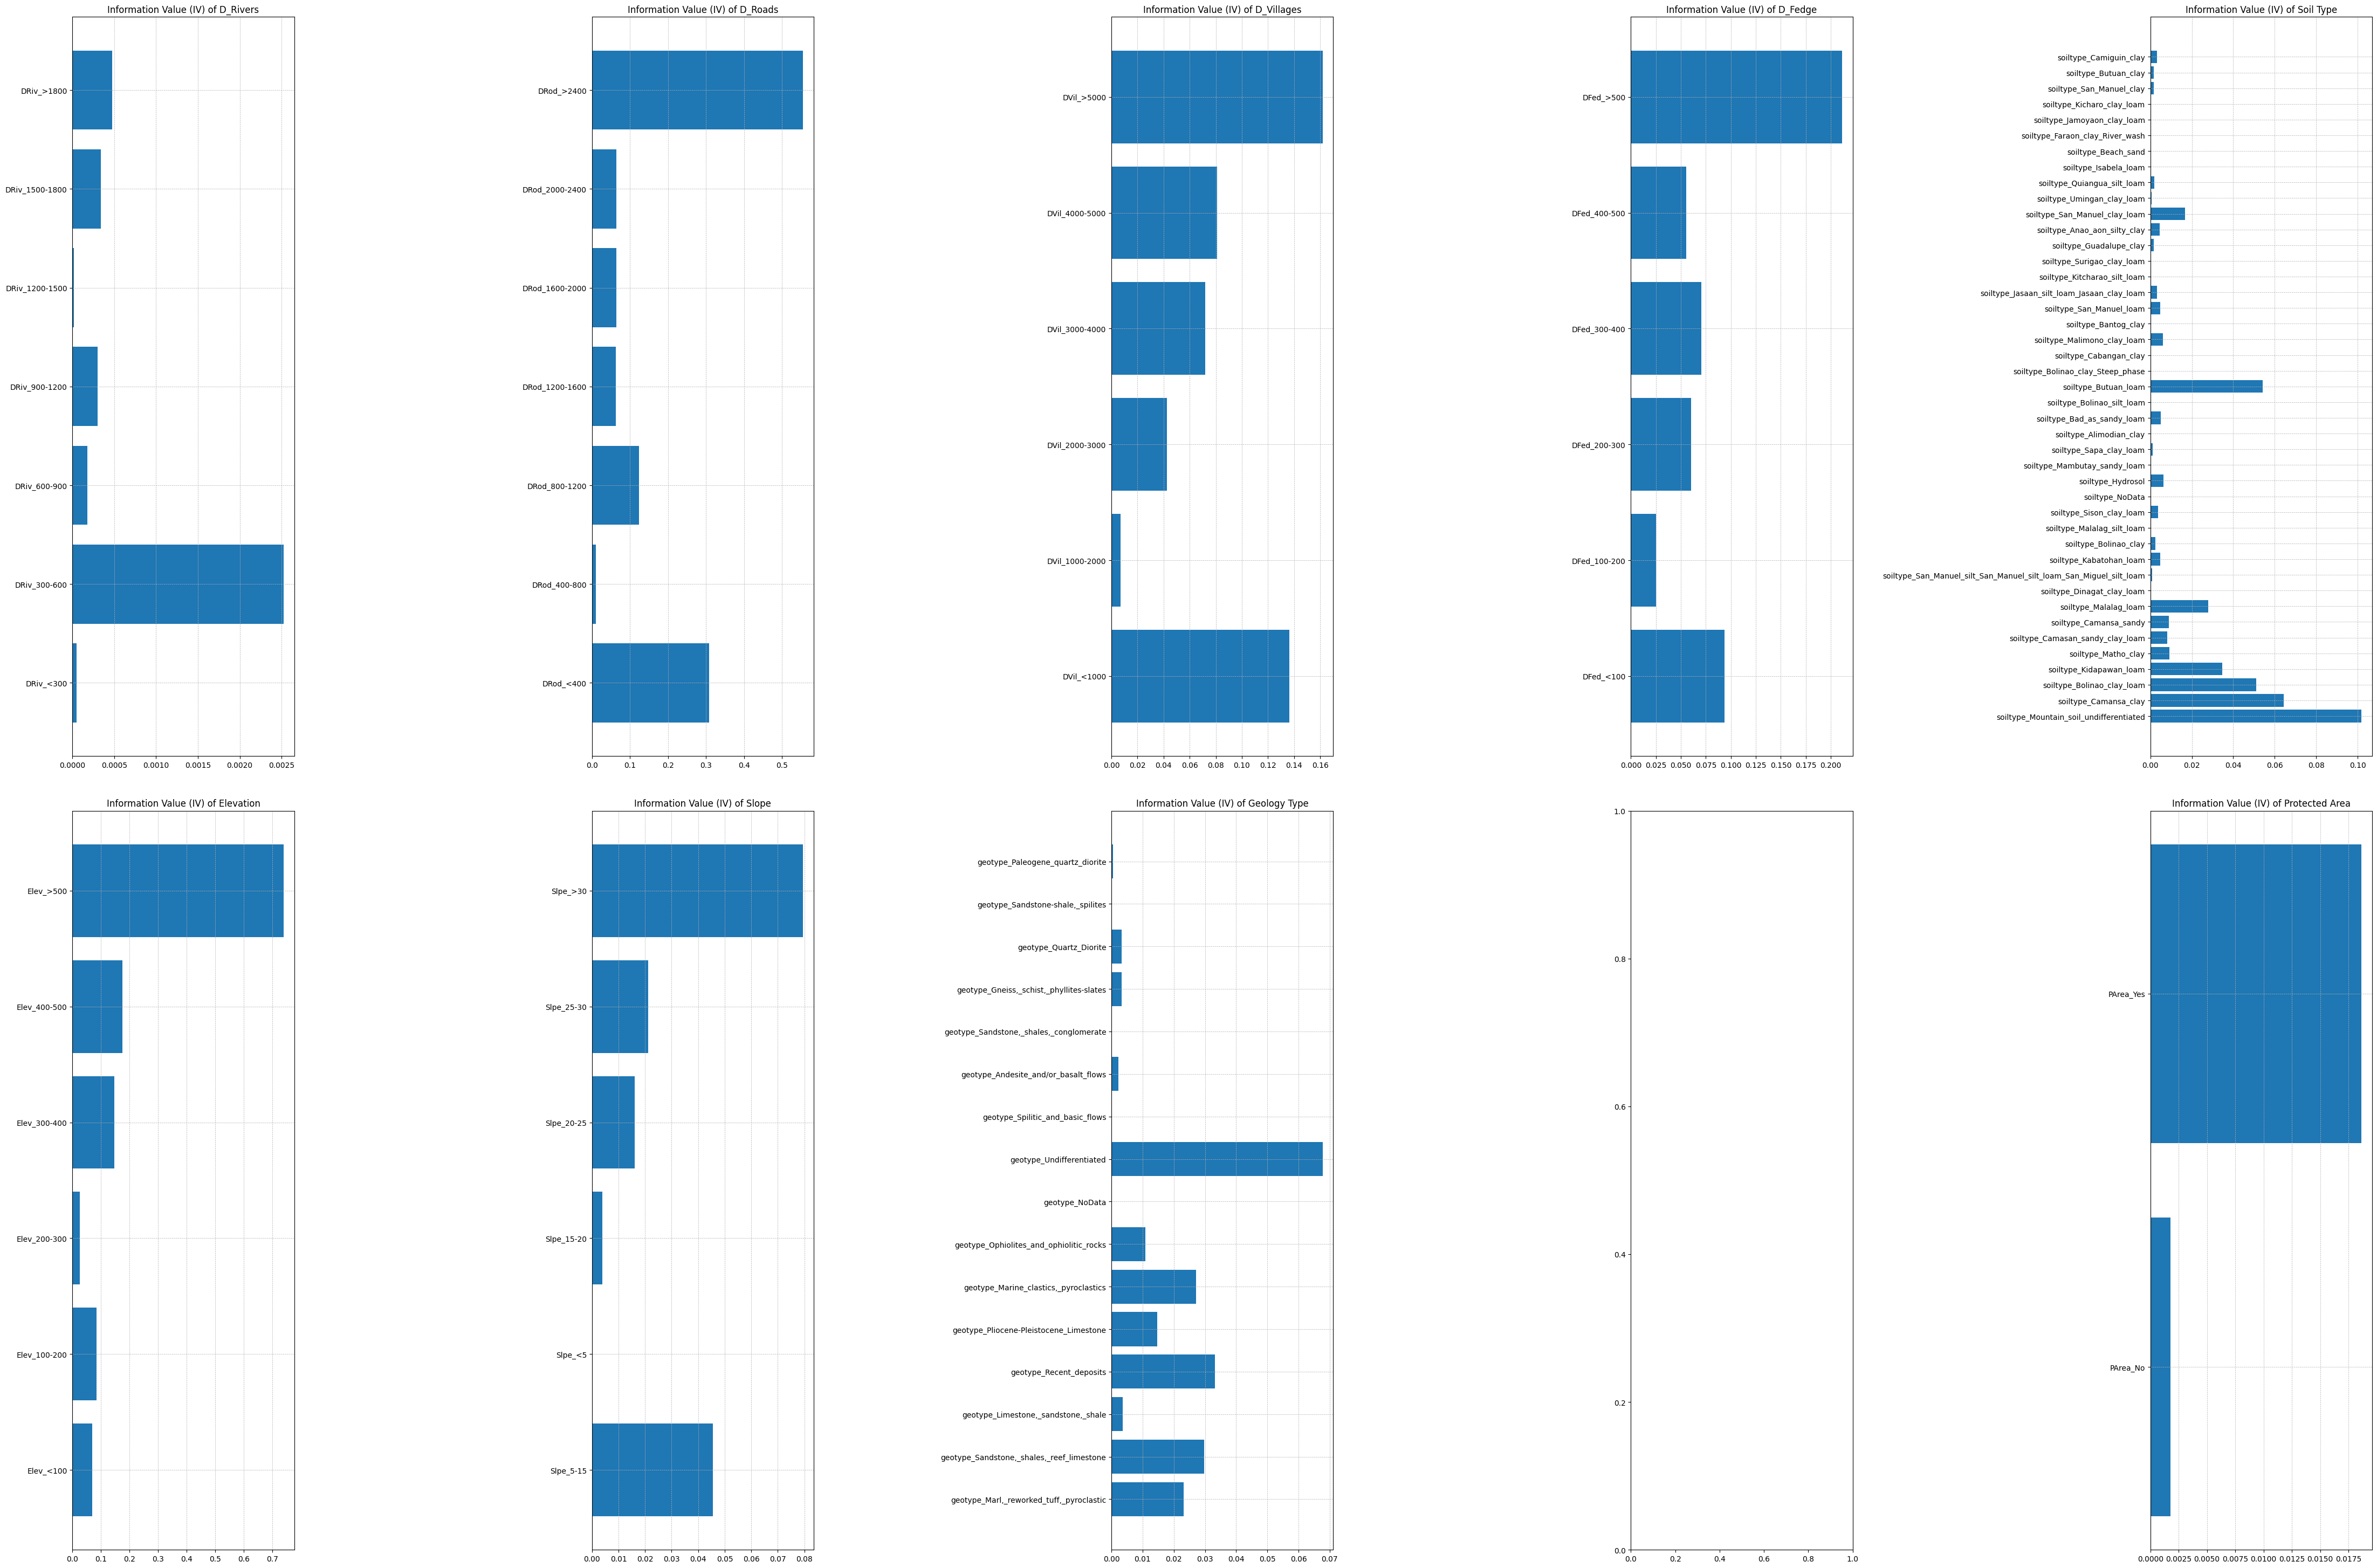

In [127]:
# Plot the total information value for each the variable
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(45, 30))

title = "Information Value (IV)"
column_name = "IV"

axes[0, 0].barh(y=river_woe["D_rivers_label"], width=river_woe[column_name])
axes[0, 0].set_title(title + " of D_Rivers")
axes[0, 0].grid(True, which='both', linestyle='--', linewidth=0.5)

axes[0, 1].barh(y=roads_woe["D_road_label"], width=roads_woe[column_name])
axes[0, 1].set_title(title + " of D_Roads")
axes[0, 1].grid(True, which='both', linestyle='--', linewidth=0.5)

axes[0, 2].barh(y=village_woe["D_villages_label"], width=village_woe[column_name])
axes[0, 2].set_title(title + " of D_Villages")
axes[0, 2].grid(True, which='both', linestyle='--', linewidth=0.5)

axes[0, 3].barh(y=DFedge_woe["D_fedge_label"], width=DFedge_woe[column_name])
axes[0, 3].set_title(title + " of D_Fedge")
axes[0, 3].grid(True, which='both', linestyle='--', linewidth=0.5)

axes[0, 4].barh(y=soiltype_woe["soiltype_label"], width=soiltype_woe[column_name])
axes[0, 4].set_title(title + " of Soil Type")
axes[0, 4].grid(True, which='both', linestyle='--', linewidth=0.5)

axes[1, 0].barh(y=elev_woe["elevation_label"], width=elev_woe[column_name])
axes[1, 0].set_title(title + " of Elevation")
axes[1, 0].grid(True, which='both', linestyle='--', linewidth=0.5)

axes[1, 1].barh(y=slope_woe["slope_label"], width=slope_woe[column_name])
axes[1, 1].set_title(title + " of Slope")
axes[1, 1].grid(True, which='both', linestyle='--', linewidth=0.5)

axes[1, 2].barh(y=geotype_woe["geotype_label"], width=geotype_woe[column_name])
axes[1, 2].set_title(title + " of Geology Type")
axes[1, 2].grid(True, which='both', linestyle='--', linewidth=0.5)

# axes[1, 3].barh(y=mineright_woe["mineright_label"], width=mineright_woe[column_name])
# axes[1, 3].set_title(title + " of Mining Rights")
# axes[1, 3].grid(True, which='both', linestyle='--', linewidth=0.5)

axes[1, 4].barh(y=protectedarea_woe["protectedarea_label"], width=protectedarea_woe[column_name])
axes[1, 4].set_title(title + " of Protected Area")
axes[1, 4].grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout(pad=4.0)
plt.show()

In [152]:
# Create a dictionary
data = {
    'Spatial Determinants': ['IV River', 'IV Roads', 'IV Villages', 'IV Forest Edge', 'IV Elevation', 'IV Slope', 'IV Geology Type', 
                            #  'IV Mining Rights', 
                             'IV Soil Type', 'IV Protected Area', 'IV Temperature', 'IV Rainfall'],
    'Total IV': [river_IV_sum, roads_IV_sum, village_IV_sum, DFedge_IV_sum, elev_IV_sum, slope_IV_sum, geotype_IV_sum, 
                #  mineright_IV_sum, 
                 soiltype_IV_sum, protectedarea_IV_sum,temperature_IV_sum, rainfall_IV_sum]
}

# Create a DataFrame
iv_df = pd.DataFrame(data)

# Display the DataFrame
iv_df

,Spatial Determinants,Total IV
0,IV River,0.003789
1,IV Roads,1.228470
2,IV Villages,0.518695
3,IV Forest Edge,0.524295
4,IV Elevation,1.259941
5,IV Slope,0.174590
6,IV Geology Type,0.221920
7,IV Soil Type,0.433573
8,IV Protected Area,0.019859
9,IV Temperature,0.691382


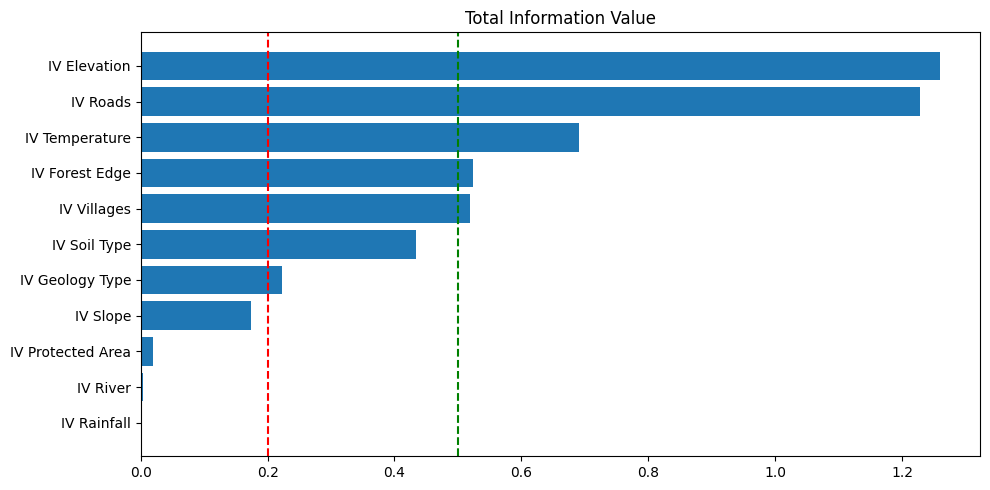

In [154]:
# Sort the DataFrame by 'Total IV'
iv_df_sorted = iv_df.sort_values(by='Total IV')

# Plot the total information value for each the variable
fig, ax = plt.subplots(figsize = (10,5))

ax.barh(y=iv_df_sorted["Spatial Determinants"], width=iv_df_sorted["Total IV"])
ax.set_title("Total Information Value")

ax.axvline(x=0.2, color='r', linestyle='--', label='IV = 0.2')
ax.axvline(x=0.5, color='g', linestyle='--', label='VIF = 0.5')

plt.tight_layout()
plt.show()

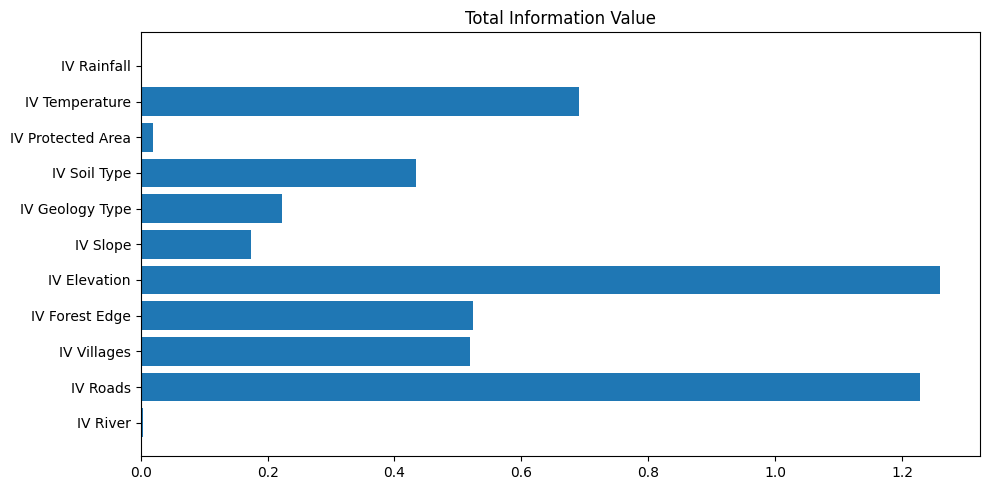

In [155]:
# Plot the total information value for each the variable
fig, ax = plt.subplots(figsize = (10,5))

ax.barh(y=iv_df["Spatial Determinants"], width=iv_df["Total IV"])
ax.set_title("Total Information Value")

plt.tight_layout()
plt.show()

In [54]:
# Concant the all the spatial determinants to the dataframe
list_df = [river_woe, roads_woe, village_woe, DFedge_woe, elev_woe, slope_woe, geotype_woe, mineright_woe]
spatial_determinants = non_label_columns
combined_df = pd.DataFrame()

for df in list_df:
    for determinant in spatial_determinants:
        if f"{determinant}_label" in df.columns:
            temp_df = df[['WoE','IV',f"{determinant}_label"]]
            combined_df = pd.concat([combined_df, temp_df])

In [55]:
# Sort the dataframe by 'WoE' column
sorted_df = combined_df.sort_values(by='IV', ascending=False)

In [56]:
# Remove Column wiht "_label"
label_cols = sorted_df.filter(regex='_label$').columns
sorted_df = sorted_df.drop(columns=label_cols)

In [57]:
sorted_df

defo,WoE,IV
geotype_NoData,-4.327208,2.667913
DFed_>500,-3.655447,2.231629
DVil_>5000,-2.787008,1.190800
DRod_>2400,-1.978382,0.922086
Slpe_<5,-1.346608,0.659568
...,...,...
DRod_1600-2000,0.109921,0.000379
DRod_2000-2400,0.031725,0.000025
DFed_300-400,-0.032458,0.000018
DVil_3000-4000,0.005696,0.000002


In [58]:
# Export the DataFrame to a CSV file
sorted_df.to_csv('sorted_df.csv', index=True)